## SALES EFFECTIVENESS PREDICTION 

#### PROBLEM STATEMENT
- Predicting Sales Effectiveness is a challenging task, as it involves the unpredictability of customer decisions—some may buy the product, while others may decline the sale.
- Numerous factors contribute to the complexity of sales, including the `sales agent`, the `day` of the month, the `month`, and the `delivery mode` of the project.
- Ultimately, the success of a sale is influenced by various factors, with one crucial element being the `Source`.This initial point of contact plays a pivotal role in guiding potential customers towards our SAAS offerings and significantly impacts the overall outcome, which can either be a successful sale or otherwise.

**PROJECT GOAL:**

1. **Data exploration insights – Sales effectiveness**

2. **ML model to predict the Lead Category (High Potential, Low Potential)**


#### IMPORTING NECESSARY LIBRARIES 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import mysql.connector

#### GETTING THE DATA FROM MYSQL 

- SAAS companies opt for MySQL as their data storage solution due to its -robustness, scalability, and reliability.
- MySQL's flexible architecture enables efficient handling of vast volumes of user data, ensuring seamless service delivery. 
- Its open-source nature also contributes to cost-effectiveness, making it an ideal choice for SAAS providers aiming to provide top-notch services while managing operational expenses.

#### GETTING THE DATA FROM MYSQL USING MYSQL CONNECTOR

In [3]:
cursor=connection.cursor()
cursor.execute('show databases')

In [4]:
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [5]:
pd.read_sql_query("show databases",connection)

C:\Users\THENDRAL\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Database
0,information_schema
1,project_sales


In [7]:
pd.read_sql_query('show tables',connection)

C:\Users\THENDRAL\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,Tables_in_project_sales
0,data


In [8]:
query='select * from data'

#### LOADING THE DATA INTO DF FOR FURTHER DATA ANALYSIS  

In [9]:
df=pd.read_sql_query(query,connection)

C:\Users\THENDRAL\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [10]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


#### INSPECTION OF THE DATASET'S SHAPE

In [11]:
df.shape

(7422, 9)

#### SUMMARY OF THE DATASET

In [12]:
df.describe(include=object)

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


INFORMATION OF THE DATASET AND IT'S TYPES

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


#### CHECKING FOR THE NULL VALUES IN THE DATASET

In [14]:
df.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

#### THERE IS NO NULL VALUES IN THE DATA, SO WE CAN DO FURTHER ANALYSIS

#### CHECKING THE UNIQUE VALUES IN THE Product_ID

In [15]:
df.Product_ID.unique()

array(['', '9', '19', '18', '15', '27', '5', '2', '3', '25', '10', '20',
       '11', '21', '1', '12', '13', '17', '24', '26', '16', '23', '22',
       '8', '14', '6', '0', '28', '7', '4'], dtype=object)

While there are no NULL values present in the dataset, we should investigate further as there are empty entries specifically within the 'Product_ID' column. To ensure data integrity, it's essential to examine all columns for such empty entries, distinguishing them from NULL values.


**Empty Entries:**

- Empty entries refer to fields within a dataset that appear blank or contain no visible data.
- These entries may appear as whitespace, a lack of characters, or simply as an absence of data.
- Empty entries are often a result of user omission or data entry issues.

In [16]:
 df.loc[df['Product_ID'] == '']


,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
5,14-11-2018 07:33,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
6,14-11-2018 05:58,,Website,XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
7,14-11-2018 05:49,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
8,14-11-2018 05:40,,Website,078XXXXXXX,DXXXXXXXheblue.com,Sales-Agent-10,,Mode-5,Open
9,14-11-2018 05:06,,Website,XXXXXXX,jXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [17]:
df.Product_ID.value_counts()

18    1711
15    1518
19    1189
9      992
27     739
5      487
10     168
1      105
20     102
25      90
21      66
        58
2       38
12      36
26      31
14      27
11      12
22       8
3        7
17       7
6        7
8        6
13       5
24       3
16       3
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

In [18]:
 df.loc[df.Location == '']

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
5,14-11-2018 07:33,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
6,14-11-2018 05:58,,Website,XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
7,14-11-2018 05:49,,Website,XXXXXXX,rXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
8,14-11-2018 05:40,,Website,078XXXXXXX,DXXXXXXXheblue.com,Sales-Agent-10,,Mode-5,Open
9,14-11-2018 05:06,,Website,XXXXXXX,jXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [19]:
df.Location.value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

**CREATING A NEW DF WITH MISSING_VALUES WITH BOOLEAN VALUES TO GET TO KNOW MORE ABOUT THE MISSING_VALUES**

In [20]:
missing_values = df == ''

In [21]:
df.shape

(7422, 9)

In [22]:
missing_counts=missing_values.sum()

In [23]:
total_missing=missing_counts.sum()

In [24]:
percentage_missing=(missing_counts/len(df))*100

**THERE IS NO MISSING_VALUES IN THESE COLUMNS `Created`,`EMAIL`,`Delivery_Mode`,`Status`**

In [25]:
percentage_missing

Created           0.000000
Product_ID        0.781461
Source            0.229049
Mobile           24.386958
EMAIL             0.000000
Sales_Agent       0.309890
Location          0.781461
Delivery_Mode     0.000000
Status            0.000000
dtype: float64

In [26]:
results_df=pd.DataFrame({ 
    'Column Name': missing_counts.index,
    'Missing Value Count': missing_counts.values,
    'Percentage Missing': percentage_missing.values})

In [27]:
results_df

,Column Name,Missing Value Count,Percentage Missing
0,Created,0,0.000000
1,Product_ID,58,0.781461
2,Source,17,0.229049
3,Mobile,1810,24.386958
4,EMAIL,0,0.000000
5,Sales_Agent,23,0.309890
6,Location,58,0.781461
7,Delivery_Mode,0,0.000000
8,Status,0,0.000000


**THERE IS A LOT OF MISSING DATA IN THE `Mobile` COLUMN and a little bit on all other columns**

**We can safely remove both the `EMAIL` and `Mobile` columns as they do not provide meaningful information, and their presence may pose a risk in terms of handling sensitive data.**

In [28]:
df.drop(["EMAIL","Mobile"],inplace=True,axis=1)

In [29]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,Sales-Agent-10,,Mode-5,Open


In [30]:
df.Location.value_counts()

Other Locations    2500
Bangalore          2084
Chennai             909
Hyderabad           528
Delhi               471
Mumbai              402
Pune                142
UAE                  79
                     58
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

In [31]:
df.Location.mode()

0    Other Locations
Name: Location, dtype: object

In [32]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,Sales-Agent-10,,Mode-5,Open


**IDENTIFYING THE MISSING DATA AND LABEL THEM TO CLEAN THE DATA**

In [33]:
# Step 1: Identify how missing values are represented in the DataFrame
missing_value_representation = ''

# Step 2: Create a DataFrame to store information about missing values
missing_info_list = []

# Step 3: Loop through each column to count missing values
for column in df.columns:
    missing_count = (df[column] == missing_value_representation).sum()
    missing_info_list.append({'Column': column, 'Missing Values Count': missing_count})

# Step 4: Create a DataFrame from the list of dictionaries
missing_info_df = pd.DataFrame(missing_info_list)

# Display the DataFrame with information about missing values
print(missing_info_df)

          Column  Missing Values Count
0        Created                     0
1     Product_ID                    58
2         Source                    17
3    Sales_Agent                    23
4       Location                    58
5  Delivery_Mode                     0
6         Status                     0


**REPLACING THE MISSING VALUES WITH `NA` SO WE CAN DROP THEM LATER**

In [34]:
df = df.replace(missing_value_representation, pd.NA)

In [35]:
df.shape

(7422, 7)

**DROPPING THE `NA`(MISSING_VALUES) VALUES BECAUSE THERE IS LOW THAN `1%`,SO IT DOESNT MAKE LARGE DIFFERNCE IN THE OUTPUT**

In [36]:
df = df.dropna()

In [37]:
df.shape

(7328, 7)

In [38]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
18,13-11-2018 18:51,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential
19,13-11-2018 18:48,19,Call,Sales-Agent-4,Other Locations,Mode-5,Potential
24,13-11-2018 17:09,18,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential
25,13-11-2018 16:49,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding
26,13-11-2018 16:37,18,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive


#### FEATURE ENGINEERING

**TO SIMPLIFY THE PROCESS, WE CAN PERFORM `FEATURE ENGINEERING` BY COMBINING OR CREATING NEW COLUMNS FROM THE EXISTING VALUES IN EACH COLUMN, REDUCING THE COMPLEXITY OF THE DATASET.**

CREATING TWO  NEW COLUMNS`Created_Day`,`Created_Month` FROM `Created` BUT NOT EXTRACT THE `YEAR`,`TIME` BECASUE THE DATA ONLY CONTAINS DATA FROM 2018 AND THE TIME CAN BE VOMITED BECASUE IT IS A SAAS COMPANY, ONLY DAILY & MONTHLY REPORTS ARE ENOUGH FOR THIS FEATURE EXTRACTION

In [39]:
df['Created_Day']=pd.to_datetime(df['Created'], format='%d-%m-%Y %H:%M').dt.day

In [40]:
df['Created_Month']=pd.to_datetime(df['Created'], format='%d-%m-%Y %H:%M').dt.month

In [41]:
df.head()

,Created,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_Day,Created_Month
18,13-11-2018 18:51,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential,13,11
19,13-11-2018 18:48,19,Call,Sales-Agent-4,Other Locations,Mode-5,Potential,13,11
24,13-11-2018 17:09,18,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential,13,11
25,13-11-2018 16:49,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding,13,11
26,13-11-2018 16:37,18,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive,13,11


DROPPING THE `Created` COLUMN WE HAVE USED THAT TO EXTRACT THE DATA WE NEED FOR FURTHER ANALYSIS

In [42]:
df.drop(['Created'],axis=1,inplace=True)  

In [43]:
df.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Created_Day,Created_Month
18,9,Live Chat-Google Organic,Sales-Agent-3,Bangalore,Mode-1,Potential,13,11
19,19,Call,Sales-Agent-4,Other Locations,Mode-5,Potential,13,11
24,18,Website,Sales-Agent-11,Trivandrum,Mode-1,Potential,13,11
25,15,Website,Sales-Agent-7,Hyderabad,Mode-1,Not Responding,13,11
26,18,Call,Sales-Agent-7,Bangalore,Mode-1,In Progress Positive,13,11


REINDEXING THE COLUMN

In [44]:
df=df.reindex(columns=['Product_ID','Location','Source','Delivery_Mode','Sales_Agent','Created_Day','Created_Month','Status'])

In [45]:
df.head()

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Created_Day,Created_Month,Status
18,9,Bangalore,Live Chat-Google Organic,Mode-1,Sales-Agent-3,13,11,Potential
19,19,Other Locations,Call,Mode-5,Sales-Agent-4,13,11,Potential
24,18,Trivandrum,Website,Mode-1,Sales-Agent-11,13,11,Potential
25,15,Hyderabad,Website,Mode-1,Sales-Agent-7,13,11,Not Responding
26,18,Bangalore,Call,Mode-1,Sales-Agent-7,13,11,In Progress Positive


**VISUALIZING THE COLUMNS TO GET A BETTER UNDERSTANDING OF THE STRUCTURE AND DISTRIBUTION OF THE COLUMNS**

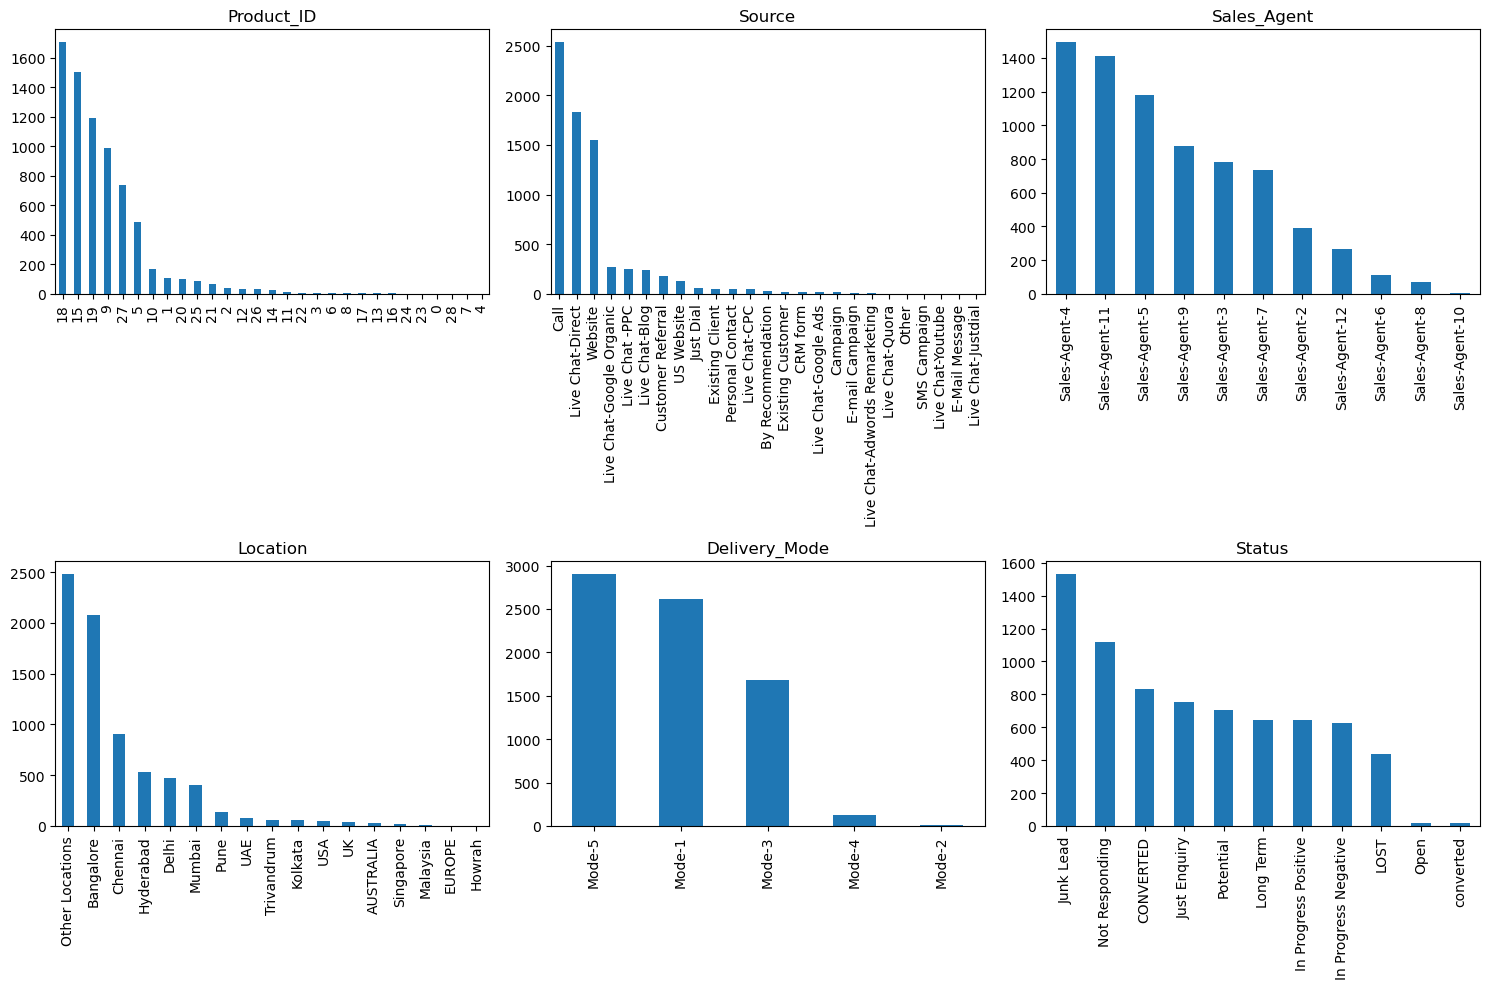

In [46]:
# List of columns to visualize
columns_to_visualize = ['Product_ID', 'Source', 'Sales_Agent', 'Location', 'Delivery_Mode', 'Status']

# Create a 2x3 grid of subplots
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(f'{column}')  # Add titles based on column names

plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()

In [47]:
df.Source.value_counts()

Call                             2536
Live Chat-Direct                 1827
Website                          1551
Live Chat-Google Organic          269
Live Chat -PPC                    249
Live Chat-Blog                    237
Customer Referral                 180
US Website                        129
Just Dial                          56
Existing Client                    51
Personal Contact                   50
Live Chat-CPC                      49
By Recommendation                  32
Existing Customer                  22
CRM form                           22
Live Chat-Google Ads               20
Campaign                           19
E-mail Campaign                    12
Live Chat-Adwords Remarketing       7
Live Chat-Quora                     2
Other                               2
SMS Campaign                        2
Live Chat-Youtube                   2
E-Mail Message                      1
Live Chat-Justdial                  1
Name: Source, dtype: int64

**TO ENHANCE DATA ANALYSIS AND USABILITY, WE CAN CREATE NEW FEATURES DERIVED FROM THE `Source` FEATURE BY COMBINING AND REPLACING THEM WITH EXISTING FEATURES.**

In [48]:
df.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Quora','Live Chat-Justdial','Live Chat-Youtube']
                  ,'Live Chat',inplace=True)

In [49]:
df.Source.replace(['Existing Client','Personal Contact','CRM form'],'Existing Clients',inplace=True)

In [50]:
df.Source.replace(['By Recommendation','Customer Referral'],'Referral',inplace=True)

In [51]:
df.Source.replace(['US Website','Just Dial'],'Website',inplace=True)

In [52]:
df.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [53]:
df.Source.value_counts()

Live Chat            2663
Call                 2536
Website              1736
Referral              212
Existing Clients      123
Campaign               36
Existing Customer      22
Name: Source, dtype: int64

**TO ENHANCE DATA ANALYSIS AND USABILITY, WE CAN CREATE NEW FEATURES DERIVED FROM THE `Location` FEATURE BY COMBINING AND REPLACING THEM WITH EXISTING FEATURES**

In [54]:
df.Location.value_counts()

Other Locations    2481
Bangalore          2079
Chennai             907
Hyderabad           527
Delhi               470
Mumbai              399
Pune                139
UAE                  77
Trivandrum           58
Kolkata              55
USA                  45
UK                   41
AUSTRALIA            25
Singapore            17
Malaysia              4
EUROPE                3
Howrah                1
Name: Location, dtype: int64

CREATING A REGION_MAPPING TO AGGREGATE THE `Location` FEATURE INTO BROADER REGIONS FOR EASIER DATA ANALYSIS.

In [55]:
region_mapping = {
    'South India': ['Bangalore', 'Chennai', 'Hyderabad', 'Trivandrum'],
    'North India': ['Delhi', 'Mumbai', 'Pune', 'Kolkata', 'Howrah'],
    'UAE': ['UAE'],
    'USA': ['USA'],
    'UK': ['UK'],
    'AUSTRALIA': ['AUSTRALIA'],
    'Singapore': ['Singapore'],
    'Malaysia': ['Malaysia'],
    'EUROPE': ['EUROPE'],
    'Other Locations': ['Other Locations']}

CREATING A NEW COLUMN `Region` AND LOADING THE REGION_MAPPING IN TO THE NEW FEATURE

In [56]:
df['Region']=df['Location'].apply(lambda x: next(region for region, locations in region_mapping.items() if x in locations))


In [57]:
df.head()

,Product_ID,Location,Source,Delivery_Mode,Sales_Agent,Created_Day,Created_Month,Status,Region
18,9,Bangalore,Live Chat,Mode-1,Sales-Agent-3,13,11,Potential,South India
19,19,Other Locations,Call,Mode-5,Sales-Agent-4,13,11,Potential,Other Locations
24,18,Trivandrum,Website,Mode-1,Sales-Agent-11,13,11,Potential,South India
25,15,Hyderabad,Website,Mode-1,Sales-Agent-7,13,11,Not Responding,South India
26,18,Bangalore,Call,Mode-1,Sales-Agent-7,13,11,In Progress Positive,South India


DROPPING THE `Location` COLUMN WE HAVE USED THAT TO EXTRACT THE DATA WE NEED FOR FURTHER ANALYSIS

In [58]:
df.drop(['Location'],axis=1,inplace=True)

In [59]:
df.head()

,Product_ID,Source,Delivery_Mode,Sales_Agent,Created_Day,Created_Month,Status,Region
18,9,Live Chat,Mode-1,Sales-Agent-3,13,11,Potential,South India
19,19,Call,Mode-5,Sales-Agent-4,13,11,Potential,Other Locations
24,18,Website,Mode-1,Sales-Agent-11,13,11,Potential,South India
25,15,Website,Mode-1,Sales-Agent-7,13,11,Not Responding,South India
26,18,Call,Mode-1,Sales-Agent-7,13,11,In Progress Positive,South India


In [60]:
df.Status.value_counts()

Junk Lead               1532
Not Responding          1119
CONVERTED                834
Just Enquiry             751
Potential                705
Long Term                644
In Progress Positive     642
In Progress Negative     625
LOST                     439
Open                      19
converted                 18
Name: Status, dtype: int64

TO IMPROVE DATA ANALYSIS AND UTILITY, WE CAN GENERATE NEW ATTRIBUTES BY MERGING AND SUBSTITUTING EXISTING ATTRIBUTES BASED ON THE `Status` FEATURE. THIS WILL ENABLE US TO IDENTIFY THE LEAD CATEGORY AND MANUALLY CLASSIFY `HIGHPOTENTIAL` AND `LOWPOTENTIAL` LEADS.

In [61]:
df.Status.replace(['converted','CONVERTED','In Progress Positive','Potential','Long Term','Open'],'HighPotential',inplace=True)
df.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'LowPotential',inplace=True)

In [62]:
df.head()

,Product_ID,Source,Delivery_Mode,Sales_Agent,Created_Day,Created_Month,Status,Region
18,9,Live Chat,Mode-1,Sales-Agent-3,13,11,HighPotential,South India
19,19,Call,Mode-5,Sales-Agent-4,13,11,HighPotential,Other Locations
24,18,Website,Mode-1,Sales-Agent-11,13,11,HighPotential,South India
25,15,Website,Mode-1,Sales-Agent-7,13,11,LowPotential,South India
26,18,Call,Mode-1,Sales-Agent-7,13,11,HighPotential,South India


In [63]:
df.loc[df.Status=='LowPotential' ]

,Product_ID,Source,Delivery_Mode,Sales_Agent,Created_Day,Created_Month,Status,Region
25,15,Website,Mode-1,Sales-Agent-7,13,11,LowPotential,South India
27,18,Live Chat,Mode-3,Sales-Agent-9,13,11,LowPotential,Other Locations
30,19,Live Chat,Mode-4,Sales-Agent-4,13,11,LowPotential,UK
31,18,Call,Mode-1,Sales-Agent-7,13,11,LowPotential,South India
36,19,Website,Mode-1,Sales-Agent-7,13,11,LowPotential,Other Locations
...,...,...,...,...,...,...,...,...
7416,19,Live Chat,Mode-3,Sales-Agent-9,28,4,LowPotential,Other Locations
7417,9,Call,Mode-4,Sales-Agent-6,28,4,LowPotential,North India
7418,15,Call,Mode-5,Sales-Agent-12,28,4,LowPotential,Other Locations
7419,5,Live Chat,Mode-1,Sales-Agent-11,28,4,LowPotential,South India


In [64]:
df.columns

Index(['Product_ID', 'Source', 'Delivery_Mode', 'Sales_Agent', 'Created_Day',
       'Created_Month', 'Status', 'Region'],
      dtype='object')

In [65]:
columns=['Product_ID', 'Source', 'Delivery_Mode', 'Sales_Agent', 'Created_Day',
       'Created_Month', 'Status', 'Region']

In [66]:
filtered_df = df[df.Status == 'LowPotential'][columns]

In [67]:
filtered_df

,Product_ID,Source,Delivery_Mode,Sales_Agent,Created_Day,Created_Month,Status,Region
25,15,Website,Mode-1,Sales-Agent-7,13,11,LowPotential,South India
27,18,Live Chat,Mode-3,Sales-Agent-9,13,11,LowPotential,Other Locations
30,19,Live Chat,Mode-4,Sales-Agent-4,13,11,LowPotential,UK
31,18,Call,Mode-1,Sales-Agent-7,13,11,LowPotential,South India
36,19,Website,Mode-1,Sales-Agent-7,13,11,LowPotential,Other Locations
...,...,...,...,...,...,...,...,...
7416,19,Live Chat,Mode-3,Sales-Agent-9,28,4,LowPotential,Other Locations
7417,9,Call,Mode-4,Sales-Agent-6,28,4,LowPotential,North India
7418,15,Call,Mode-5,Sales-Agent-12,28,4,LowPotential,Other Locations
7419,5,Live Chat,Mode-1,Sales-Agent-11,28,4,LowPotential,South India


In [68]:
df.shape

(7328, 8)

<AxesSubplot:>

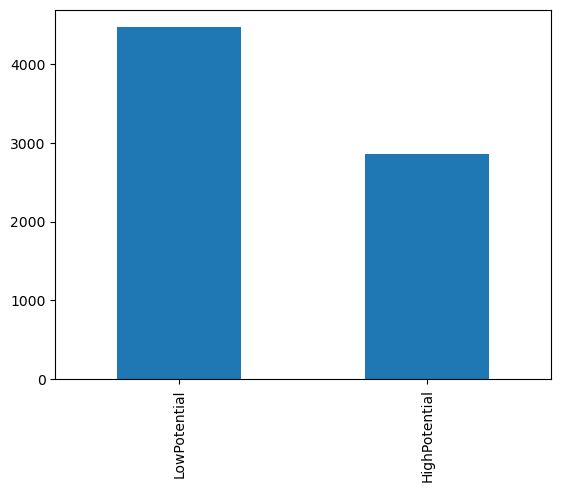

In [69]:
df.Status.value_counts().plot(kind='bar')

THERE IS A IMBALANCE THE `Status` FEATURE WE HAVE TO BALANCE IT  FURTHER IN THE DATA ANALYSIS

In [70]:
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()

In [71]:
df.dtypes

Product_ID       object
Source           object
Delivery_Mode    object
Sales_Agent      object
Created_Day       int64
Created_Month     int64
Status           object
Region           object
dtype: object

In [72]:
df.Product_ID.value_counts()

18    1706
15    1501
19    1188
9      990
27     737
5      484
10     168
1      104
20     101
25      90
21      65
2       38
12      36
26      31
14      27
11      12
22       8
3        7
6        7
8        6
17       6
13       4
16       3
24       2
23       2
0        2
28       1
7        1
4        1
Name: Product_ID, dtype: int64

THE `Product_ID` FEATURE DATATYPE IS OBJECT BUT WHEN WE CALL THE VALUE_COUNTS OF THE `Product_ID` IT'S DATATYPE IS `int64`, WE HAVE TO CHANGE THE `Product_ID` TO `int64` FOR ERRORLESS MODEL BUILDING

In [73]:
df.Product_ID=df['Product_ID'].astype('int64')

In [74]:
categorical_columns=df.select_dtypes(include=['object']).columns.tolist()

In [75]:
categorical_columns

['Source', 'Delivery_Mode', 'Sales_Agent', 'Status', 'Region']

### EDA 

In [76]:
# Define the columns to plot
columns_to_plot = [
    'Product_ID',
    'Region',
    'Source',
    'Delivery_Mode',
    'Sales_Agent',
    'Created_Month',
    'Created_Day'
]

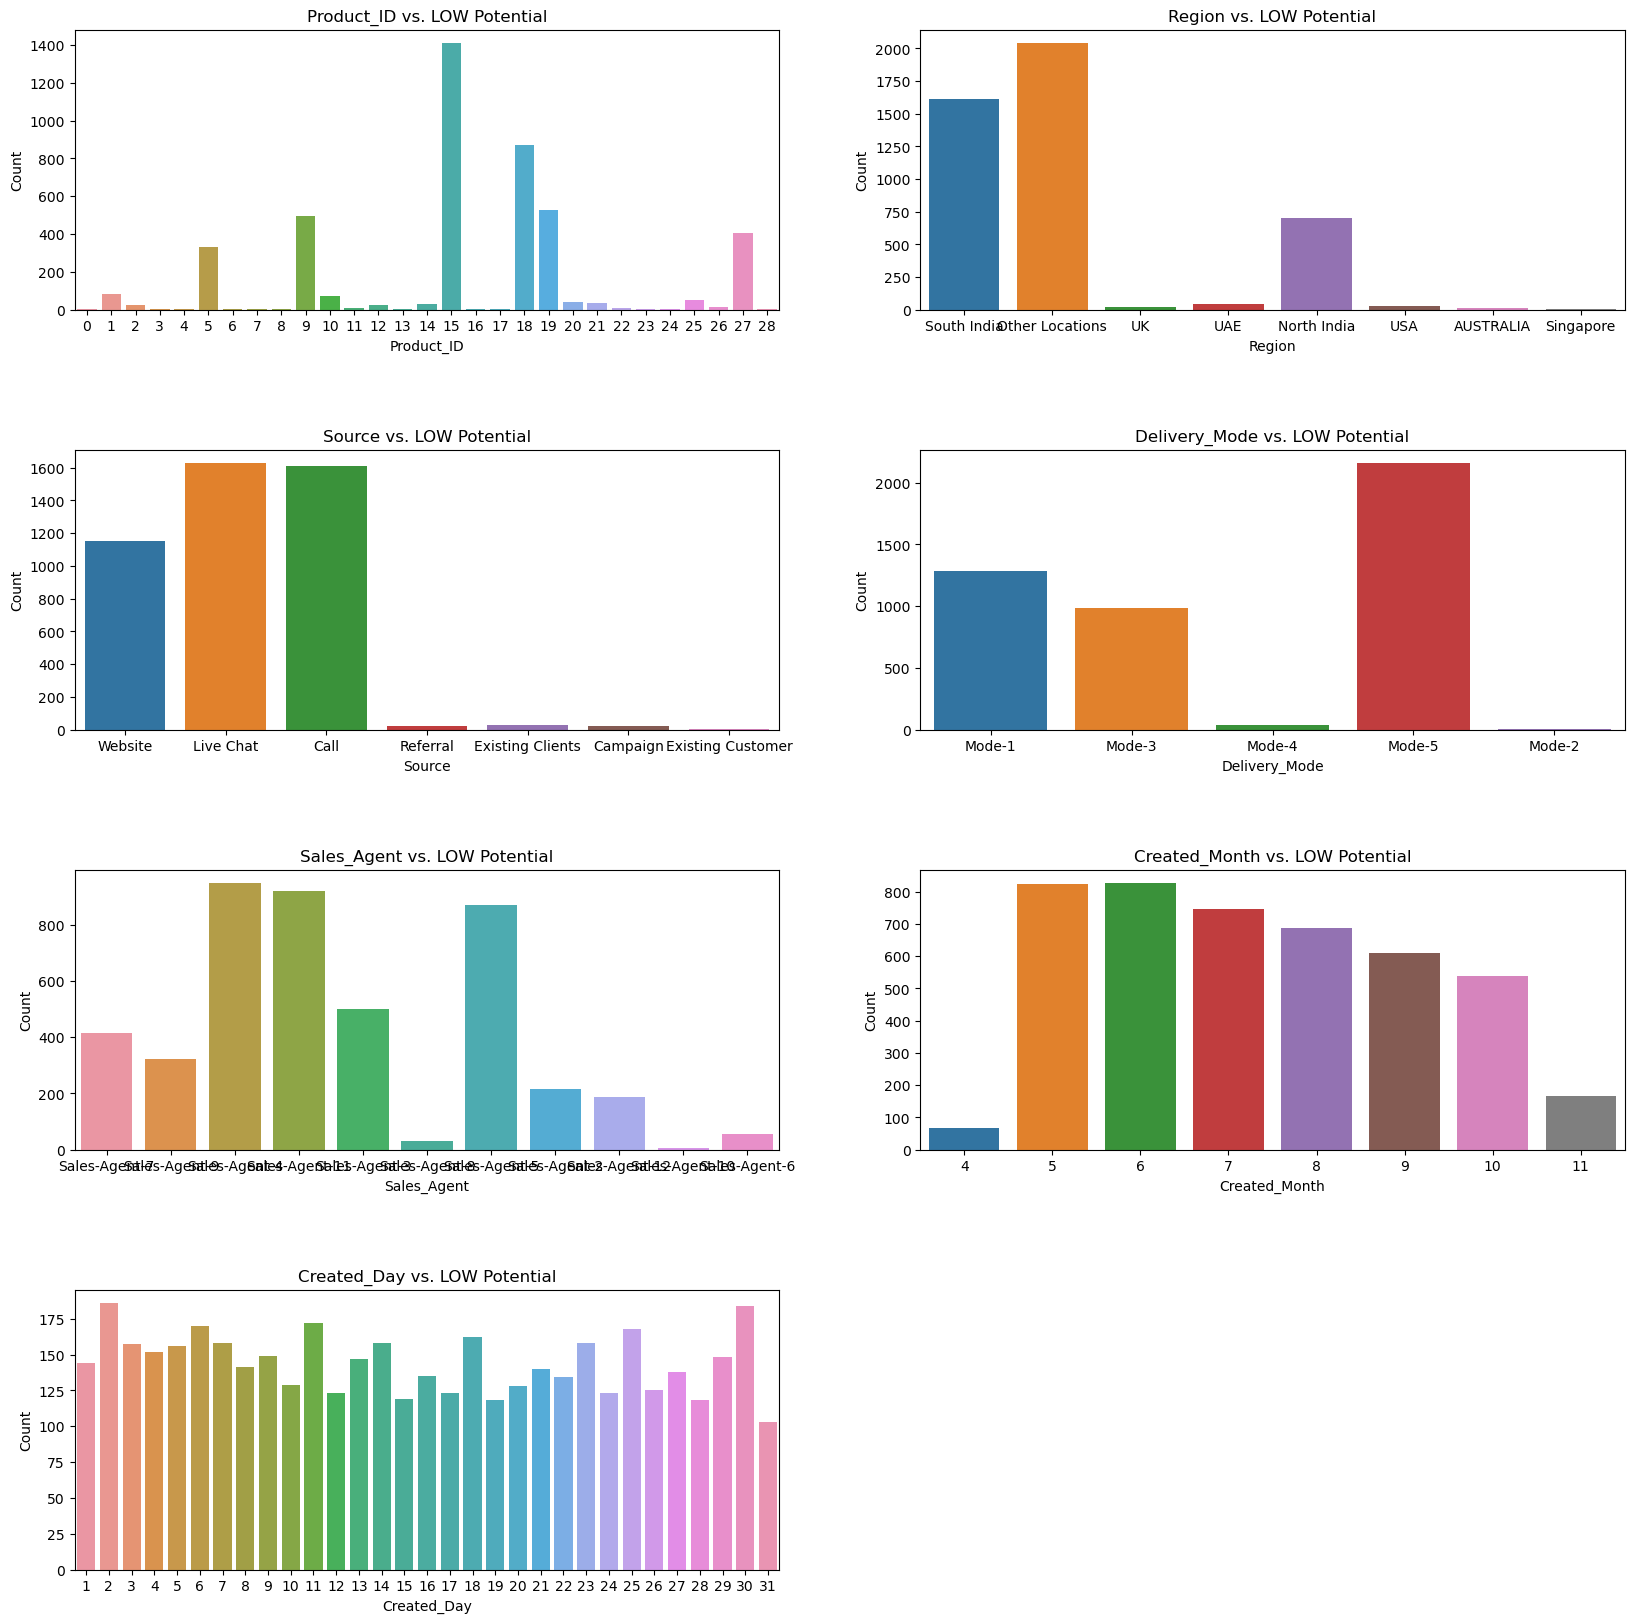

In [77]:
# Create a subplot grid
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Iterate through the columns and create bar plots
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Filter the DataFrame to include only rows where Status is LowPotential
    filtered_df = df[df['Status'] == 'LowPotential']
    
    # Check if the filtered DataFrame is empty for the current column
    if not filtered_df[column].empty:
        sns.countplot(x=filtered_df[column], ax=ax)
        ax.set_title(f'{column} vs. LOW Potential')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
    
    # Remove any empty subplots
if len(columns_to_plot) < 8:
    for i in range(len(columns_to_plot), 8):
        fig.delaxes(axes[i // 2, i % 2])
        
plt.show()

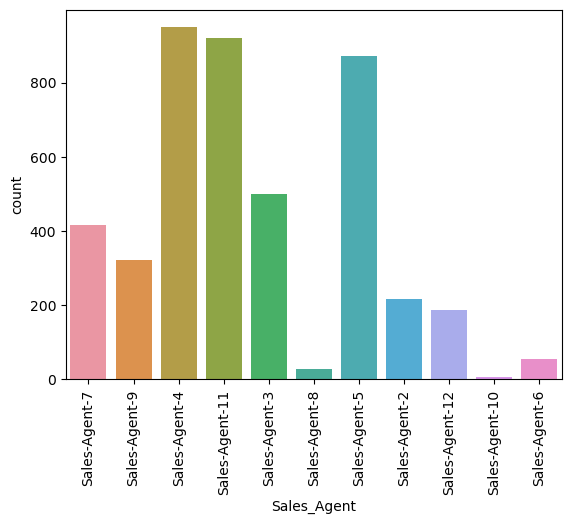

In [78]:
sns.countplot(x=filtered_df['Sales_Agent'])
plt.xticks(rotation=90)
plt.show()

#### VALUES IN THE FEATURES THAT  BRINGS LOW POTENTIAL SALES

-  PRODUCTS IN `Product_ID` THAT BRINGS LOW POTENTIAL SALES

    - **5**
    - **9**
    - **15**
    - **18**
    - **19**
    - **27**
    
- SOURCE THAT CUSTOMERS ENTER FROM  IN `Source` THAT BRINGS LOW POTENTIAL SALES

    - **WEBSITE**
    - **LIVE-CHAT**
    - **CALL**

- MODE OF DELIVERY IN `Deliver_Mode` THAT BRINGS LOW POTENTIAL SALES

    - **1**
    - **3**
    - **5**

- REGION FROM WORLD IN `Region` THAT BRINGS LOW POTENTIAL SALES

    - **SOUTH INDIA**
    - **NORTH INDIA**
    - **OTHER LOCATIONS**
    
    
- SALES AGENTS IN **FICZON IN** `Sales_Agent` BRINGS LOW POTENTIAL SALES > 100
    
    - **SALES_AGENT-9**
    - **SALES_AGENT-7**
    - **SALES_AGENT-4**
    - **SALES_AGENT-11**
    - **SALES_AGENT-3**
    - **SALES_AGENT-5**
    - **SALES_AGENT-2**
    - **SALES_AGENT-12**
    
    

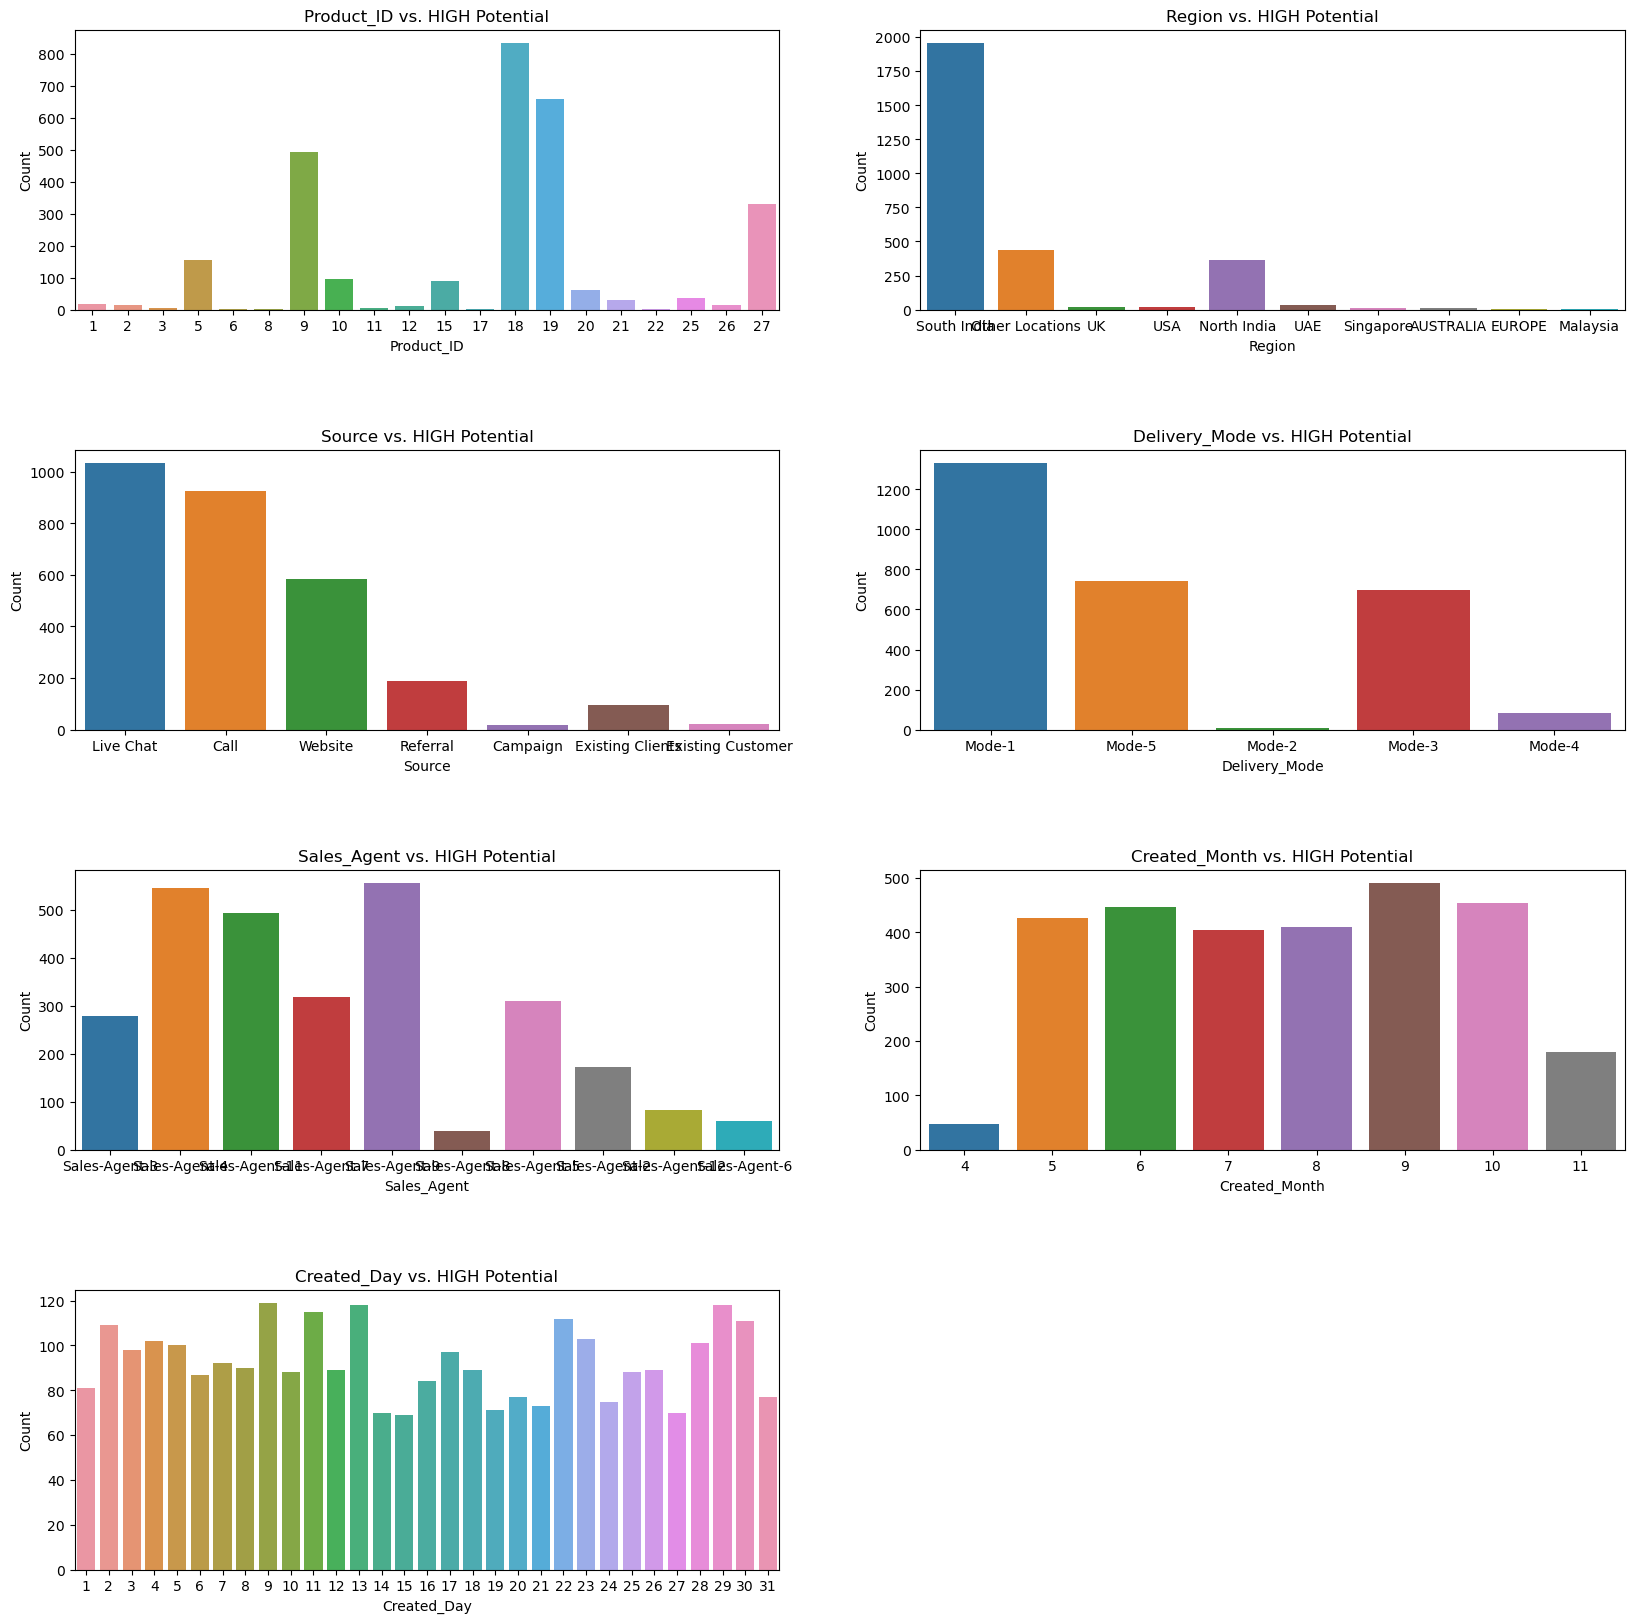

In [79]:
# Create a subplot grid
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Iterate through the columns and create bar plots
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Filter the DataFrame to include only rows where Status is HighPotential
    filtered_df = df[df['Status'] == 'HighPotential']
    
    # Check if the filtered DataFrame is empty for the current column
    if not filtered_df[column].empty:
        sns.countplot(x=filtered_df[column], ax=ax)
        ax.set_title(f'{column} vs. HIGH Potential')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')
    
    # Remove any empty subplots
if len(columns_to_plot) < 8:
    for i in range(len(columns_to_plot), 8):
        fig.delaxes(axes[i // 2, i % 2])
        
plt.show()

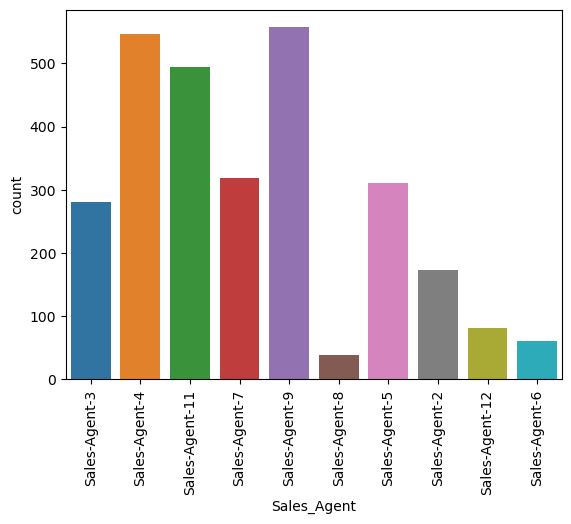

In [80]:
sns.countplot(x=filtered_df['Sales_Agent'])
plt.xticks(rotation=90)
plt.show()

#### VALUES IN THE FEATURE THAT  BRINGS HIGH POTENTIAL SALES

-  PRODUCTS IN `Product_ID` THAT BRINGS HIGH POTENTIAL SALES

    - **5**
    - **9**
    - **15**
    - **18**
    - **19**

    
- SOURCE THAT CUSTOMERS ENTER FROM  IN `Source` THAT BRINGS HIGH POTENTIAL SALES

    - **WEBSITE**
    - **LIVE-CHAT**
    - **CALL**

- MODE OF DELIVERY IN `Deliver_Mode` THAT BRINGS HIGH POTENTIAL SALES

    - **1**
    - **3**
    - **5**

- REGION FROM WORLD IN `Region` THAT BRINGS HIGH POTENTIAL SALES

    - **SOUTH INDIA**
    - **NORTH INDIA**
    - **OTHER LOCATIONS**
    
- SALES AGENTS IN **FICZON IN** `Sales_Agent` BRINGS HIGH POTENTIAL SALES > 100
    
    - **SALES_AGENT-9**
    - **SALES_AGENT-11**
    - **SALES_AGENT-7**
    - **SALES_AGENT-4**
    - **SALES_AGENT-5**
    - **SALES_AGENT-3**
    - **SALES_AGENT-2**
    

#### LABEL ENCODER TO HANDLE THE CATEGORICAL DATA IN FEATURES

`Label encoding` is employed to manage categorical data within features, converting them into a numerical format, typically represented as integers. This approach proves useful when dealing with machine learning algorithms that demand numerical input data.

In [81]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [82]:
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [83]:
df.head()

,Product_ID,Source,Delivery_Mode,Sales_Agent,Created_Day,Created_Month,Status,Region
18,9,4,0,4,13,11,0,6
19,19,0,4,5,13,11,0,4
24,18,6,0,1,13,11,0,6
25,15,6,0,8,13,11,1,6
26,18,0,0,8,13,11,0,6


Inspecting the data types of the features to ensure that label encoding has successfully converted categorical data into numerical format.

In [84]:
df.dtypes

Product_ID       int64
Source           int32
Delivery_Mode    int32
Sales_Agent      int32
Created_Day      int64
Created_Month    int64
Status           int32
Region           int32
dtype: object

In [85]:
df.Status.value_counts()

1    4466
0    2862
Name: Status, dtype: int64

#### OUTLIER DETECTION 

<AxesSubplot:>

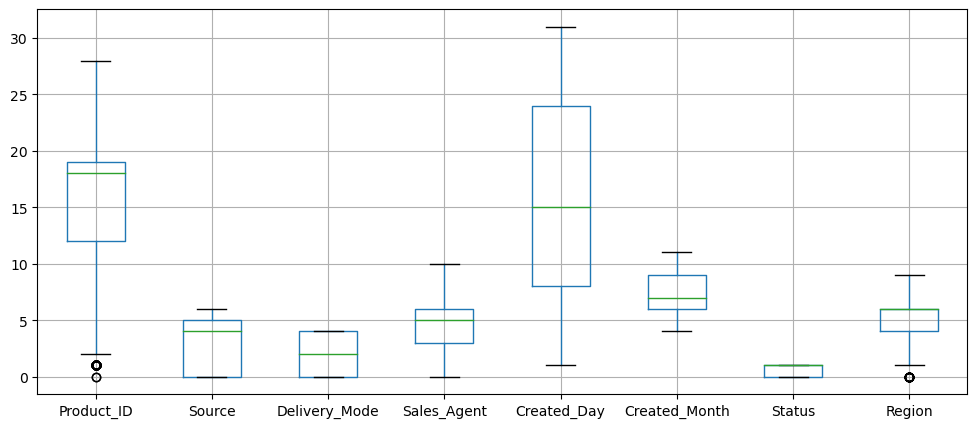

In [86]:
plt.figure(figsize=(12,5))
df.boxplot(figsize=(10,10))


THERE ARE ONLY A FEW OUTLIERS DETECTED IN BOTH THE `Product_ID` and `Region` FEATURES. HOWEVER, REMOVING OUTLIERS FROM THESE FEATURES IS NOT RECOMMENDED AS THEY REPRESENT SPECIFIC PRODUCTS AND SALES REGIONS. DOING SO COULD RESULT IN A LOSS OF VALUABLE INFORMATION RELATED TO THESE KEY ASPECTS OF SALES.

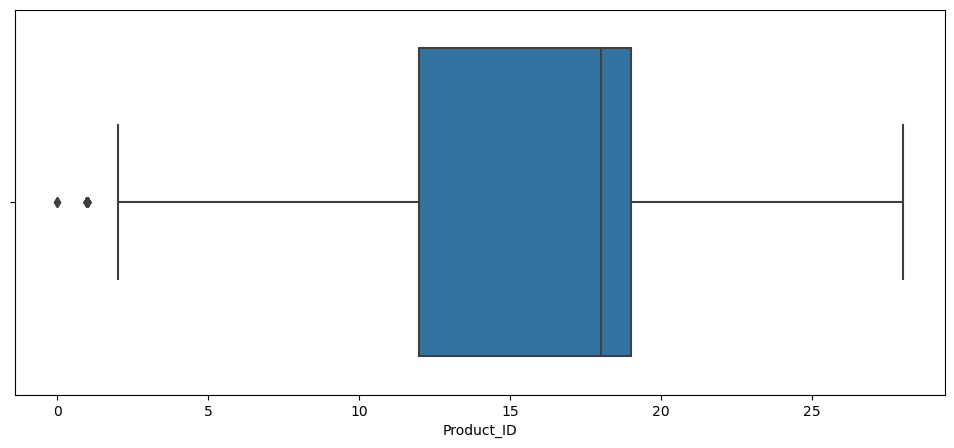

In [87]:
plt.figure(figsize=(12,5))
sns.boxplot(x=df.Product_ID)
plt.show()

#### AFTER LABEL ENCODING, WE CAN VISUALIZE THE TRANSFORMED FEATURES.

<Figure size 1200x500 with 0 Axes>

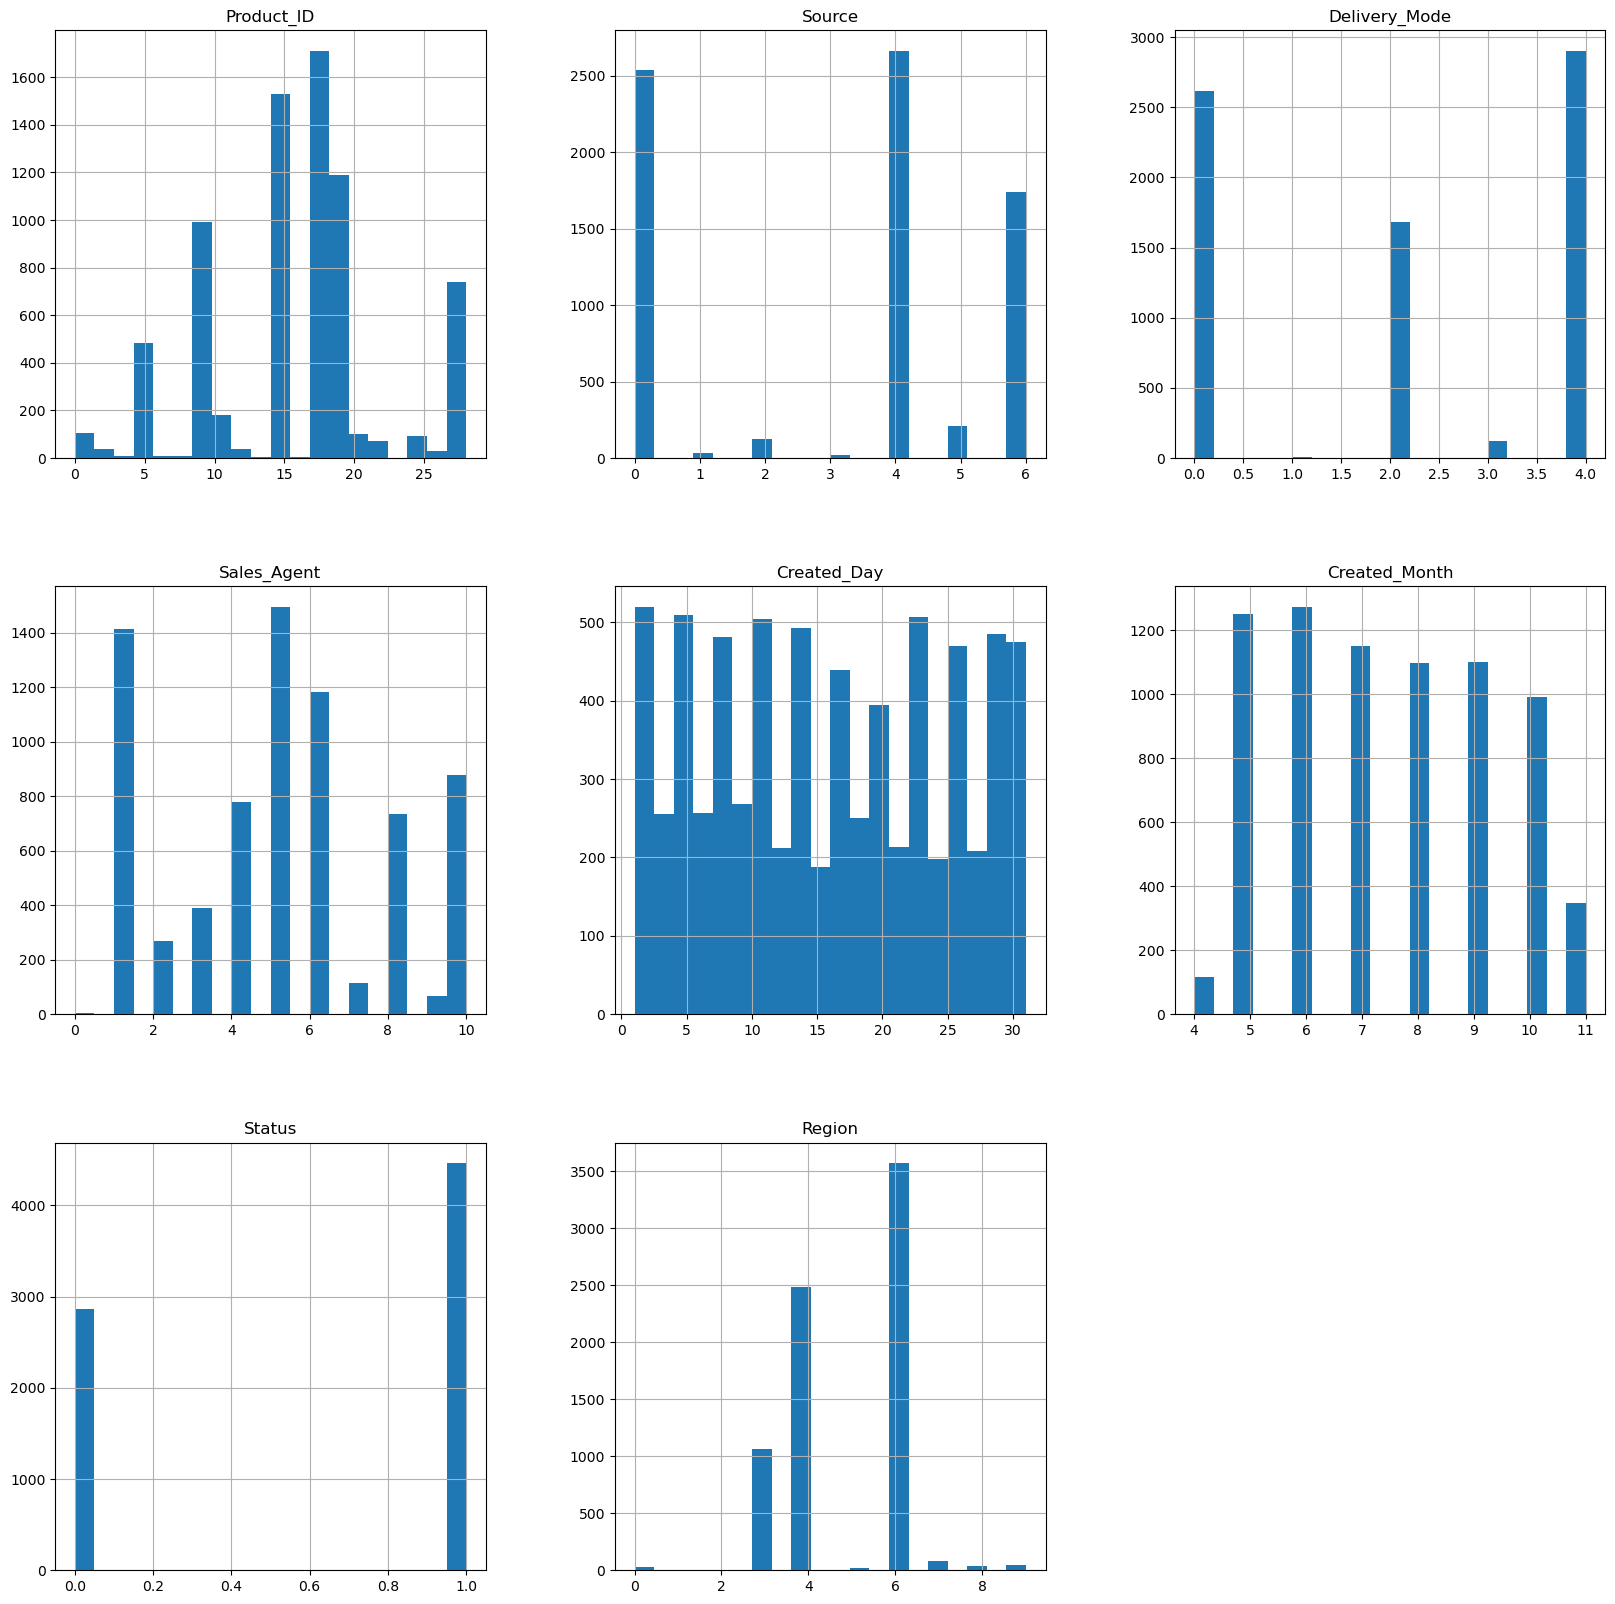

In [88]:
plt.figure(figsize=(12,5))
df.hist(bins=20,figsize=(20,20))
plt.show()

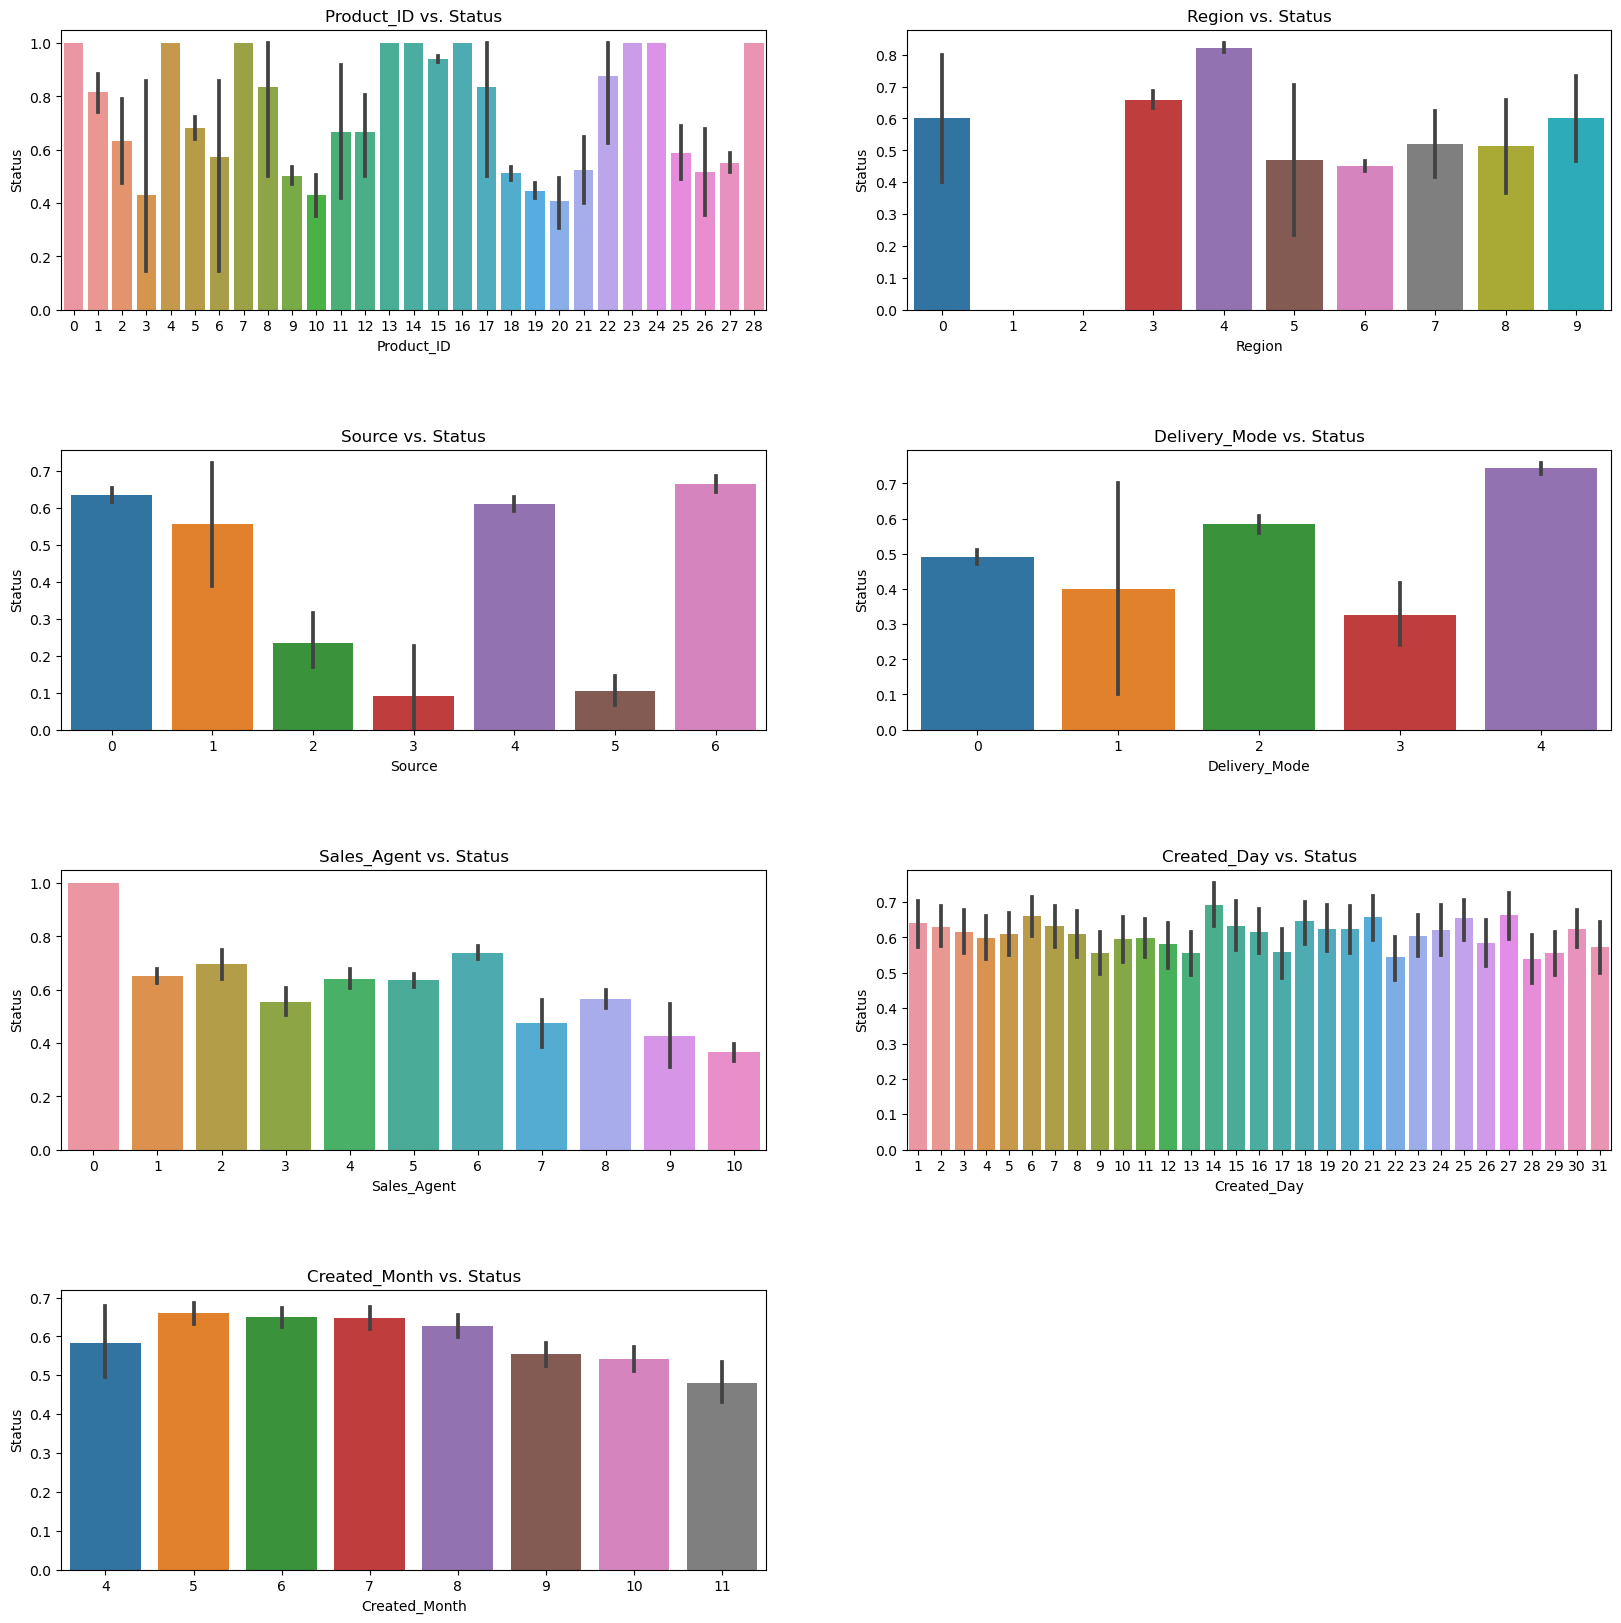

In [89]:
# Define the columns to plot
columns_to_plot = [
    'Product_ID',
    'Region',
    'Source',
    'Delivery_Mode',
    'Sales_Agent',
    'Created_Day',
    'Created_Month'
]

# Create a subplot grid
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Iterate through the columns and create bar plots
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    sns.barplot(x=df[column], y=df['Status'], ax=ax)
    ax.set_title(f'{column} vs. Status')
    ax.set_xlabel(column)
    ax.set_ylabel('Status')
    
    # Remove any empty subplots
if len(columns_to_plot) < 8:
    for i in range(len(columns_to_plot), 8):
        fig.delaxes(axes[i // 2, i % 2])
        
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

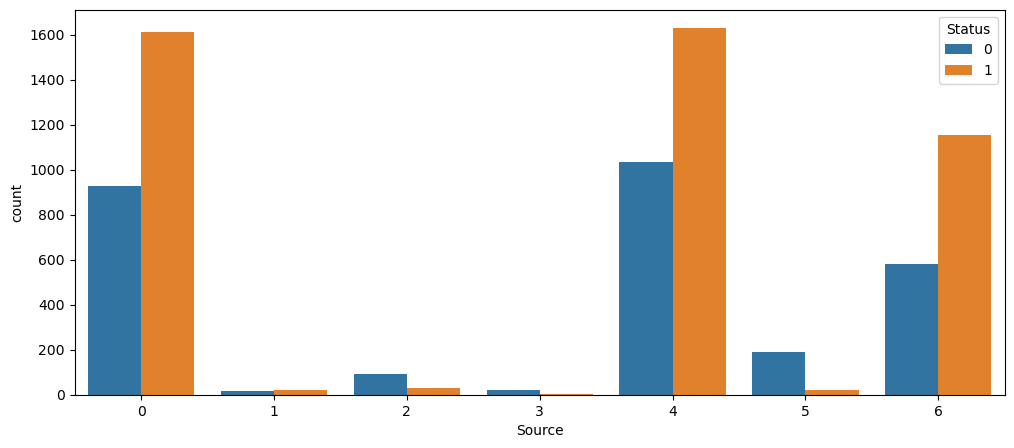

In [90]:
plt.figure(figsize=(12,5))
sns.countplot(x='Source',hue='Status',data=df)
plt.show

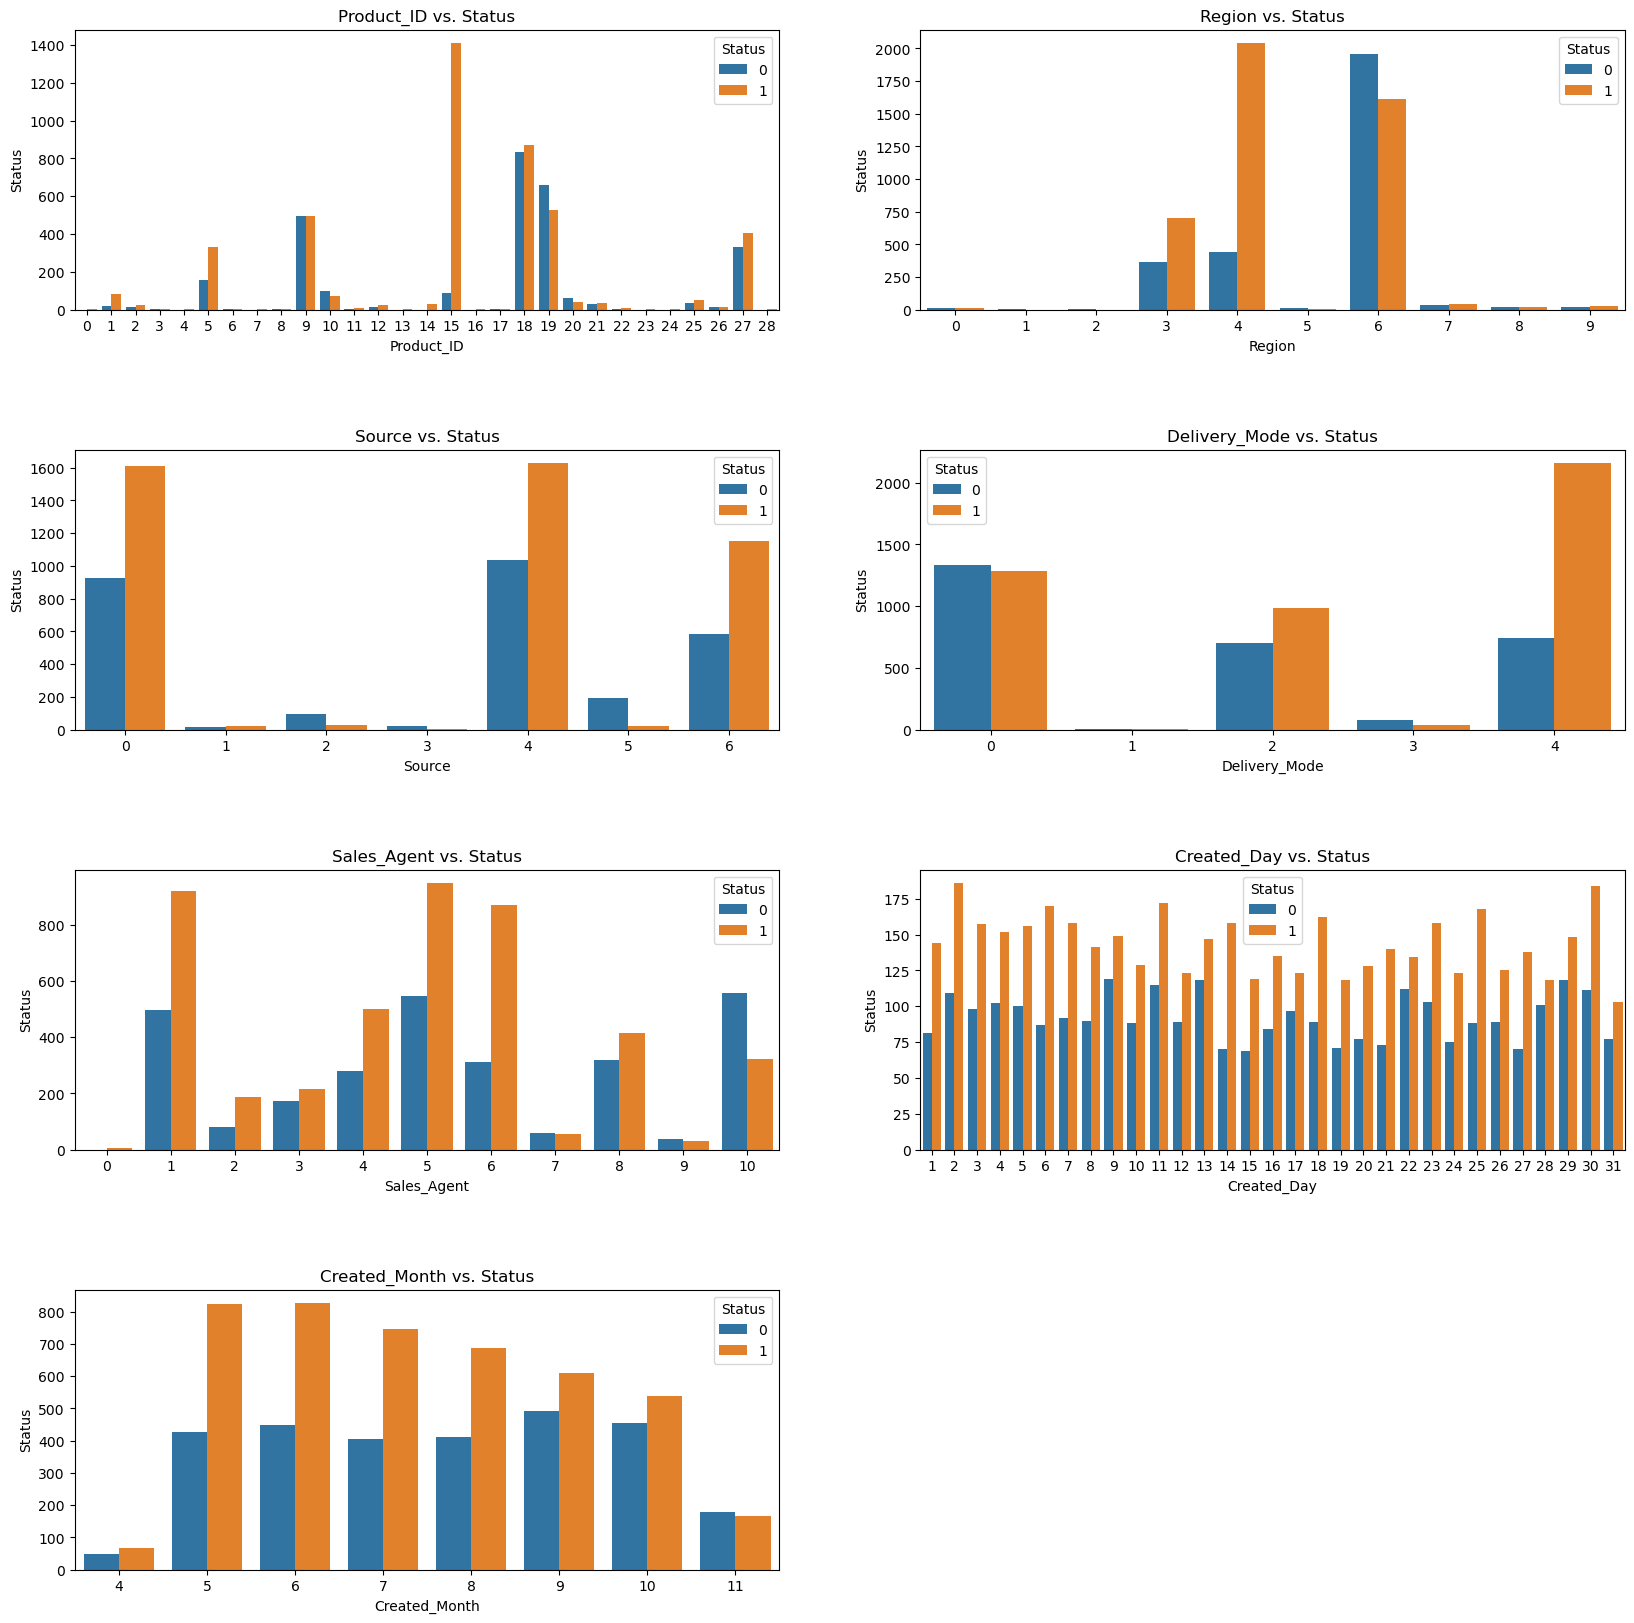

In [91]:
# Create a subplot grid
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Iterate through the columns and create bar plots
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    sns.countplot(x=df[column], hue=df['Status'], ax=ax)
    ax.set_title(f'{column} vs. Status')
    ax.set_xlabel(column)
    ax.set_ylabel('Status')
    
    # Remove any empty subplots
if len(columns_to_plot) < 8:
    for i in range(len(columns_to_plot), 8):
        fig.delaxes(axes[i // 2, i % 2])
        
plt.show()

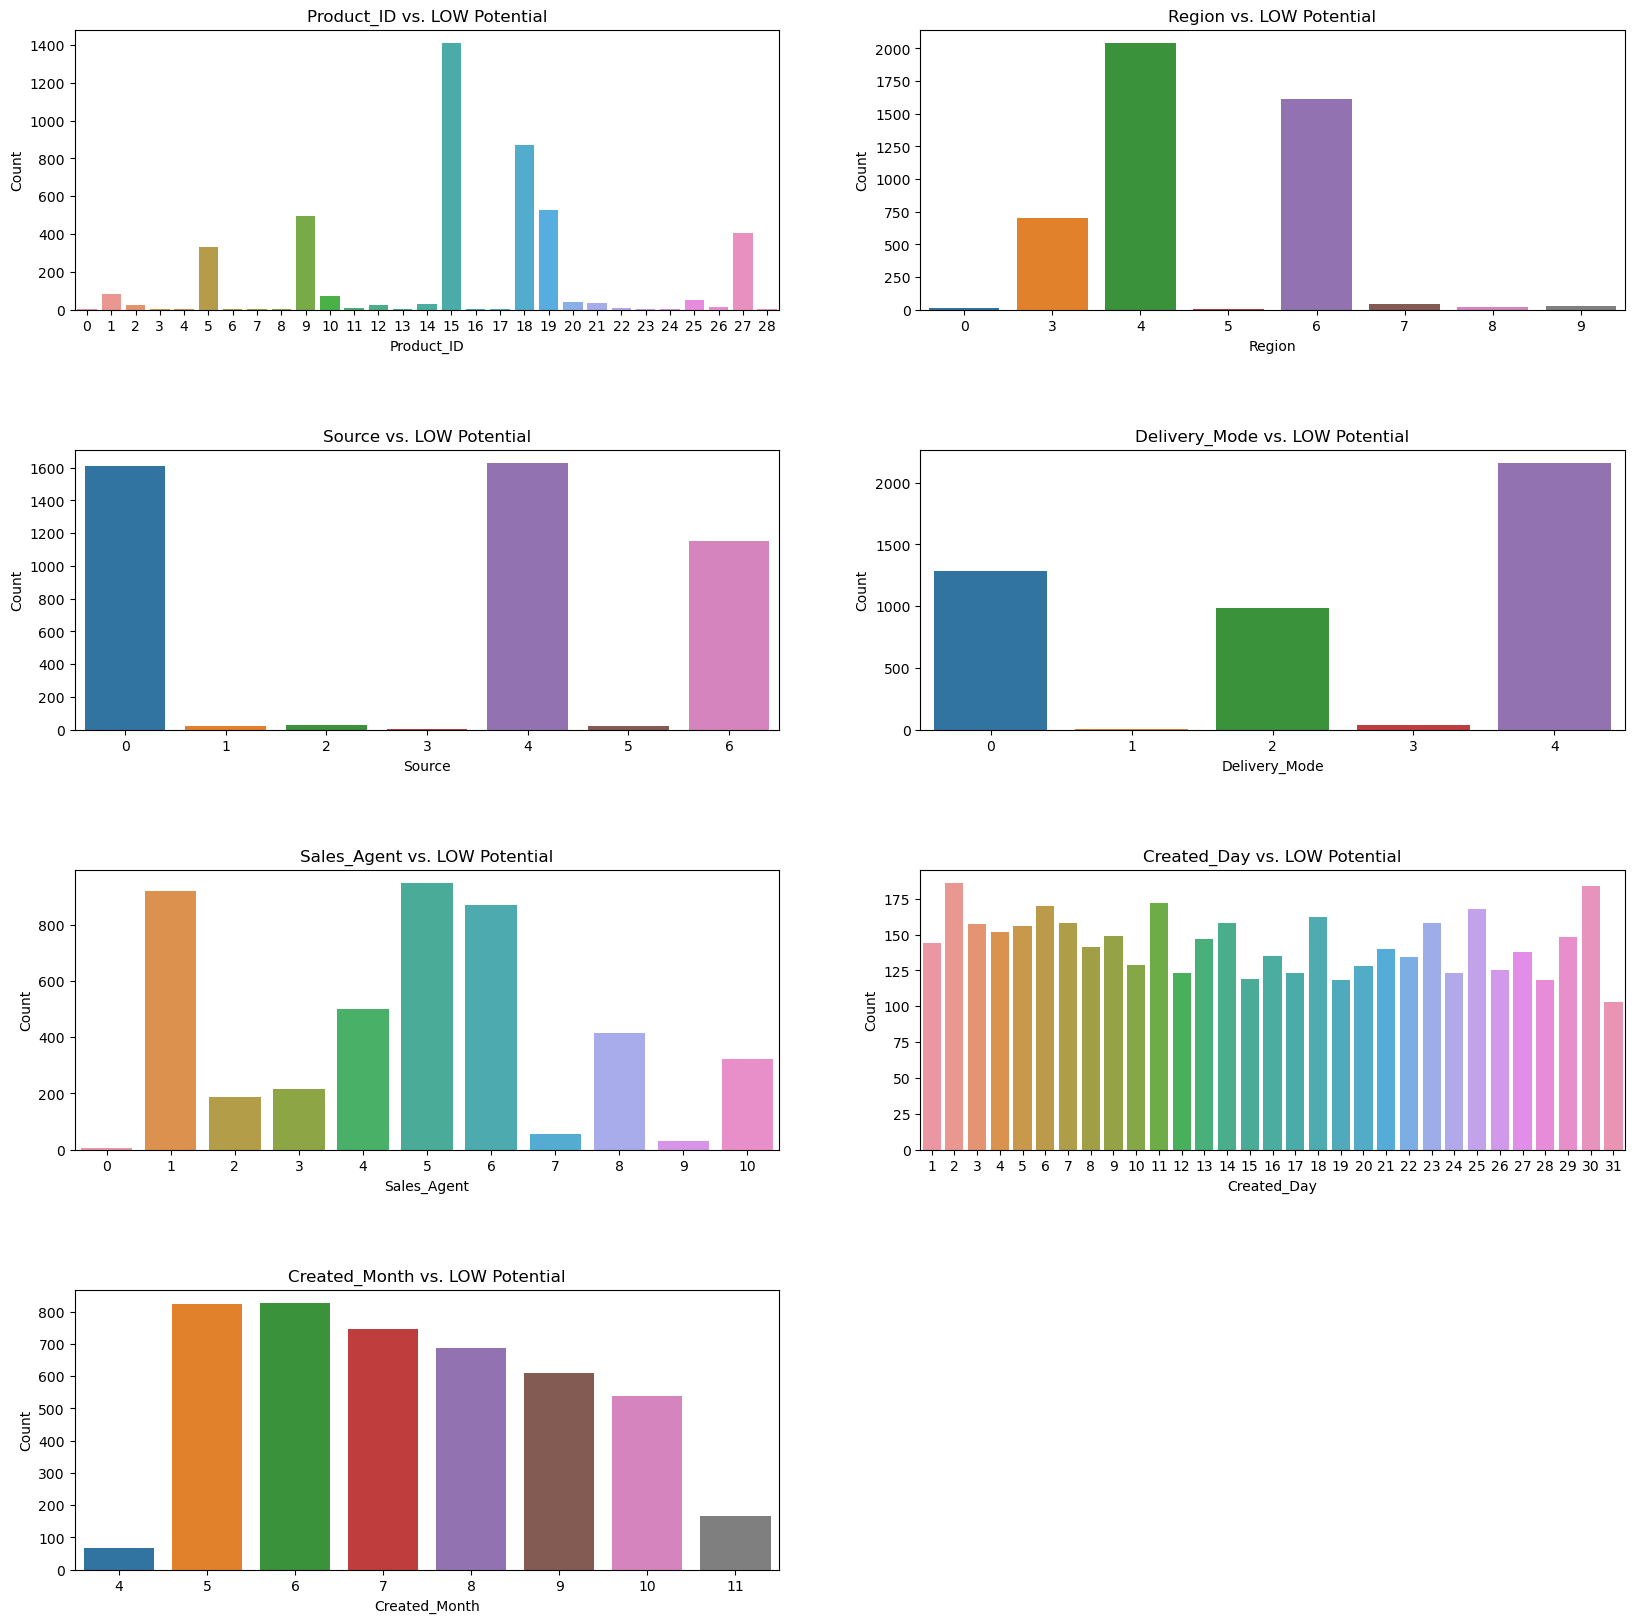

In [92]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Iterate through the columns and create bar plots
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Filter the DataFrame to include only rows where Status is 1
    filtered_df = df[df['Status'] == 1]
    
    sns.countplot(x=filtered_df[column], ax=ax)
    ax.set_title(f'{column} vs. LOW Potential')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    
    # Remove any empty subplots
if len(columns_to_plot) < 8:
    for i in range(len(columns_to_plot), 8):
        fig.delaxes(axes[i // 2, i % 2])
        
plt.show()

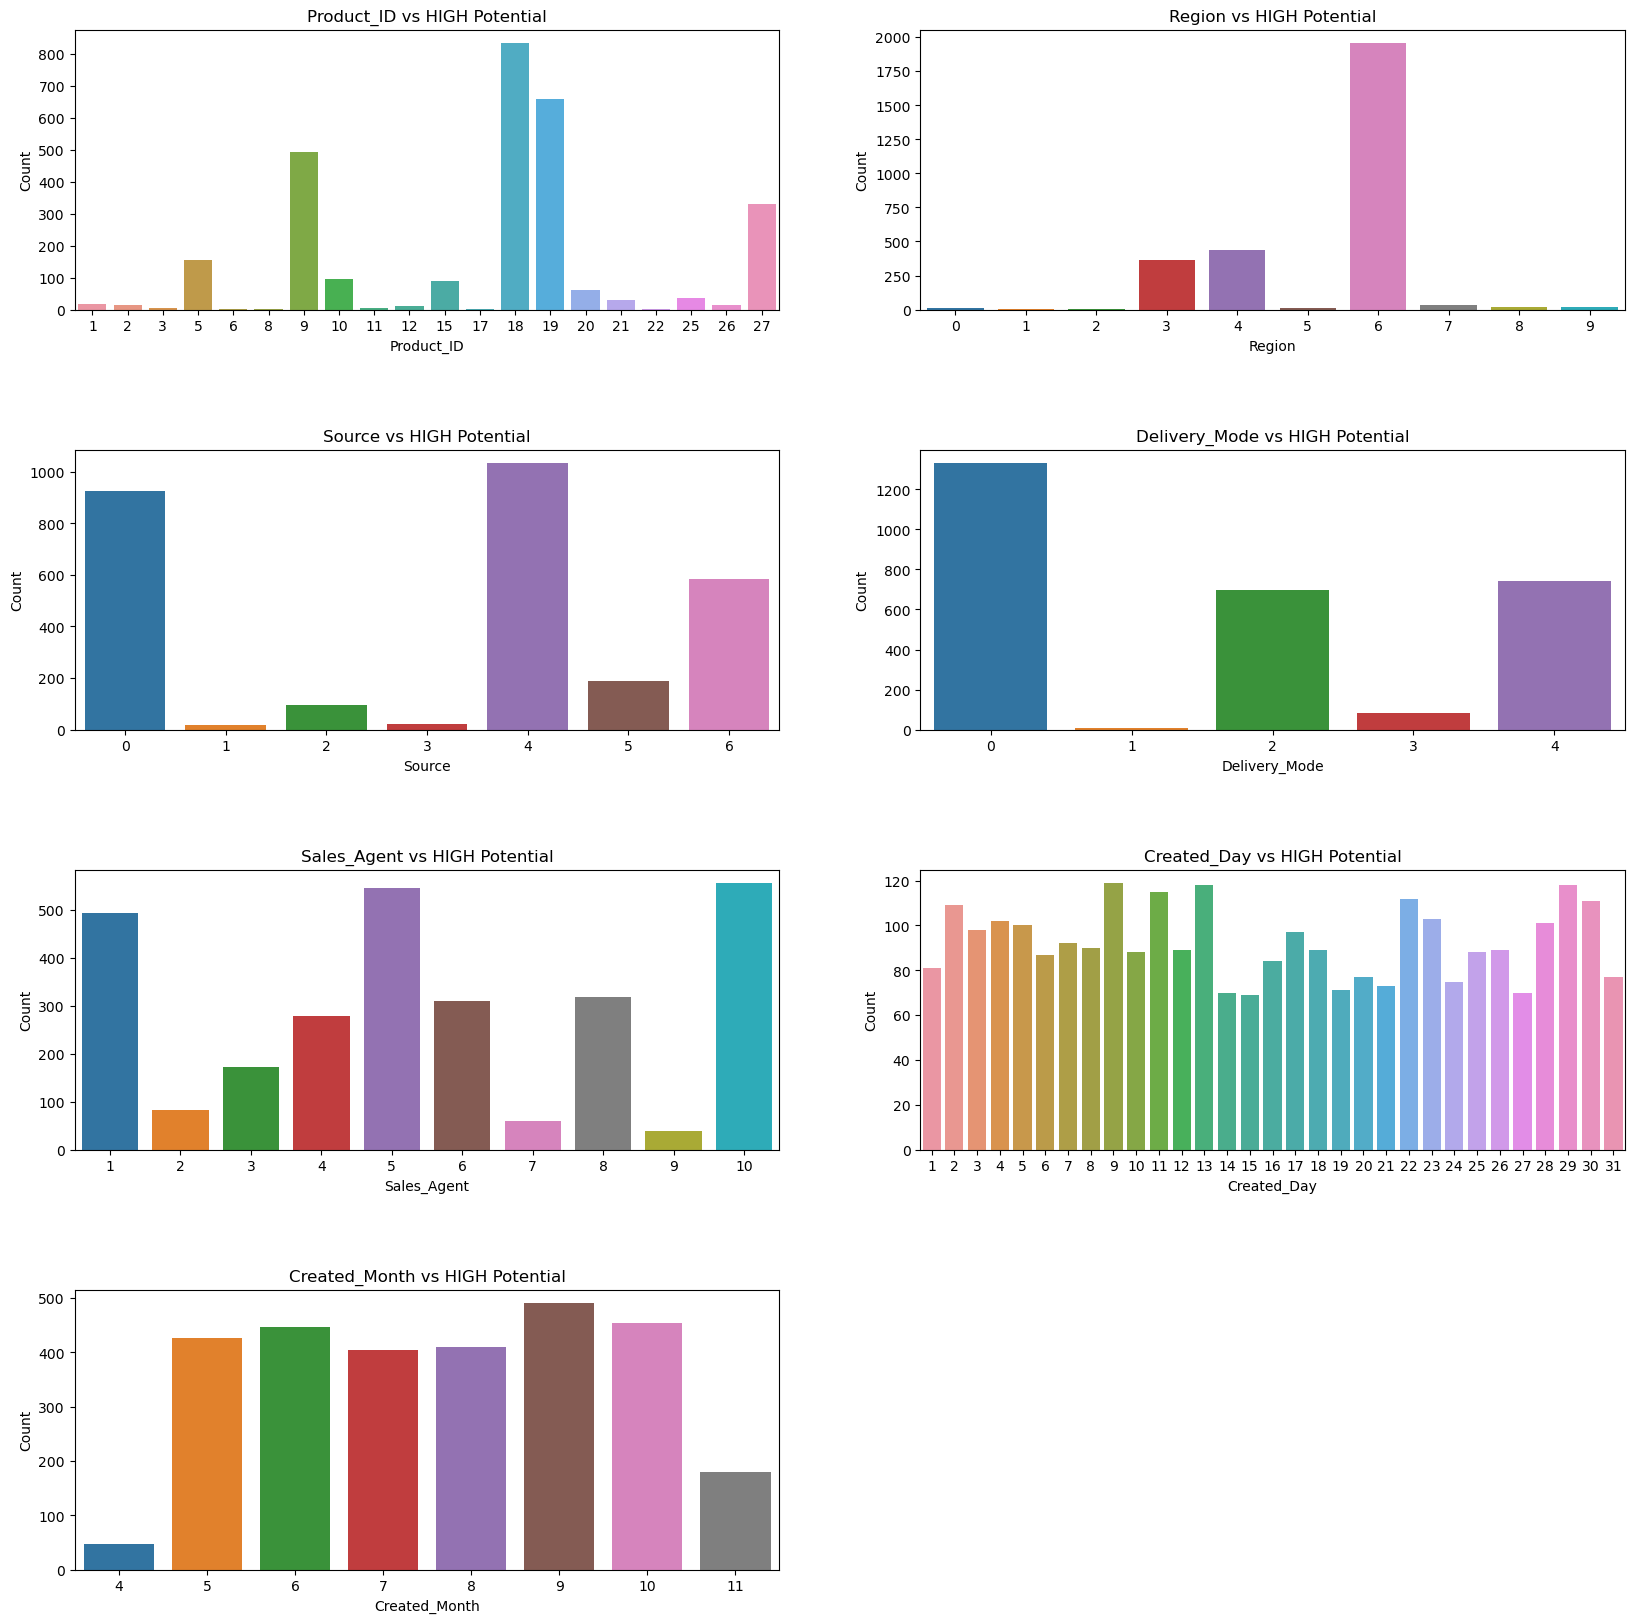

In [93]:
fig, axes = plt.subplots(4, 2, figsize=(20, 20))
fig.subplots_adjust(hspace=0.5)

# Iterate through the columns and create bar plots
for i, column in enumerate(columns_to_plot):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Filter the DataFrame to include only rows where Status is 1
    filtered_df = df[df['Status'] == 0]
    
    sns.countplot(x=filtered_df[column], ax=ax)
    ax.set_title(f'{column} vs HIGH Potential')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    
    # Remove any empty subplots
if len(columns_to_plot) < 8:
    for i in range(len(columns_to_plot), 8):
        fig.delaxes(axes[i // 2, i % 2])
        
plt.show()

#### CORELATION OF THE  FEATURES 

In [94]:
df.corr()

,Product_ID,Source,Delivery_Mode,Sales_Agent,Created_Day,Created_Month,Status,Region
Product_ID,1.000000,0.054529,-0.036025,0.006529,0.017997,0.010415,-0.085415,0.030467
Source,0.054529,1.000000,-0.206064,-0.023198,-0.032965,-0.000992,-0.007442,0.004821
Delivery_Mode,-0.036025,-0.206064,1.000000,-0.224688,0.044816,0.121348,0.220445,-0.278414
Sales_Agent,0.006529,-0.023198,-0.224688,1.000000,-0.009005,0.114074,-0.137074,0.102240
Created_Day,0.017997,-0.032965,0.044816,-0.009005,1.000000,-0.136900,-0.013647,0.001841
Created_Month,0.010415,-0.000992,0.121348,0.114074,-0.136900,1.000000,-0.096824,-0.026756
Status,-0.085415,-0.007442,0.220445,-0.137074,-0.013647,-0.096824,1.000000,-0.260605
Region,0.030467,0.004821,-0.278414,0.102240,0.001841,-0.026756,-0.260605,1.000000


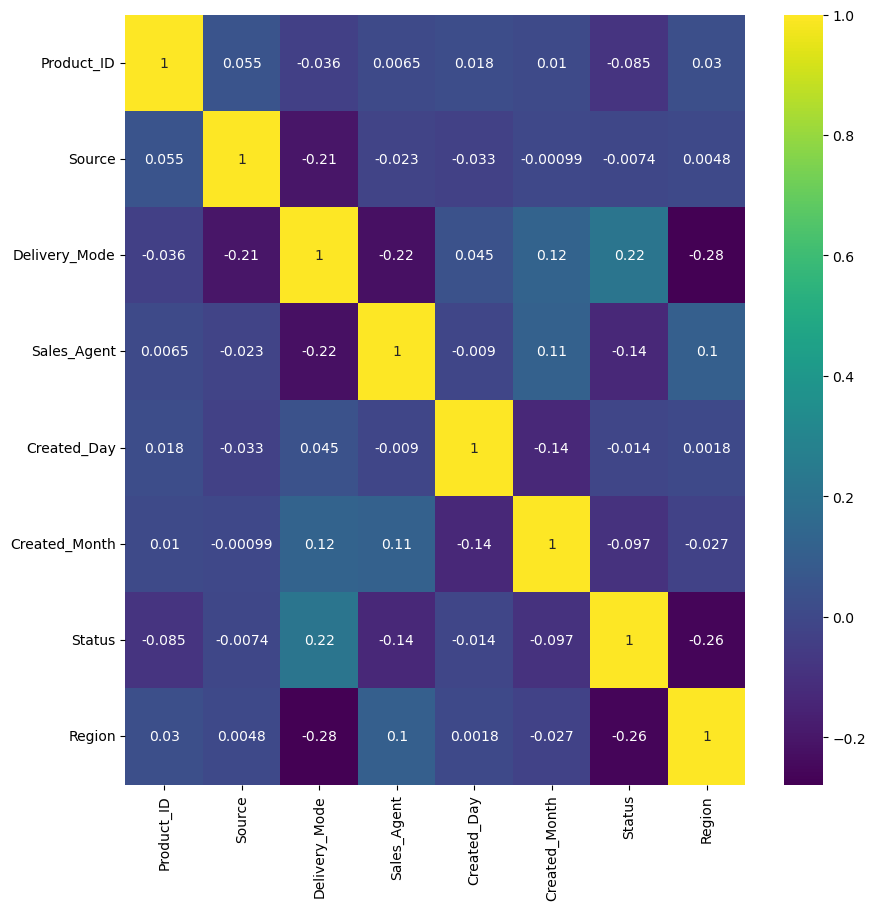

In [95]:
plt.figure(figsize=(10,10))
corr=df.corr()
corr=pd.DataFrame(corr)
sns.heatmap(corr,annot=True,cmap='viridis')
plt.show()

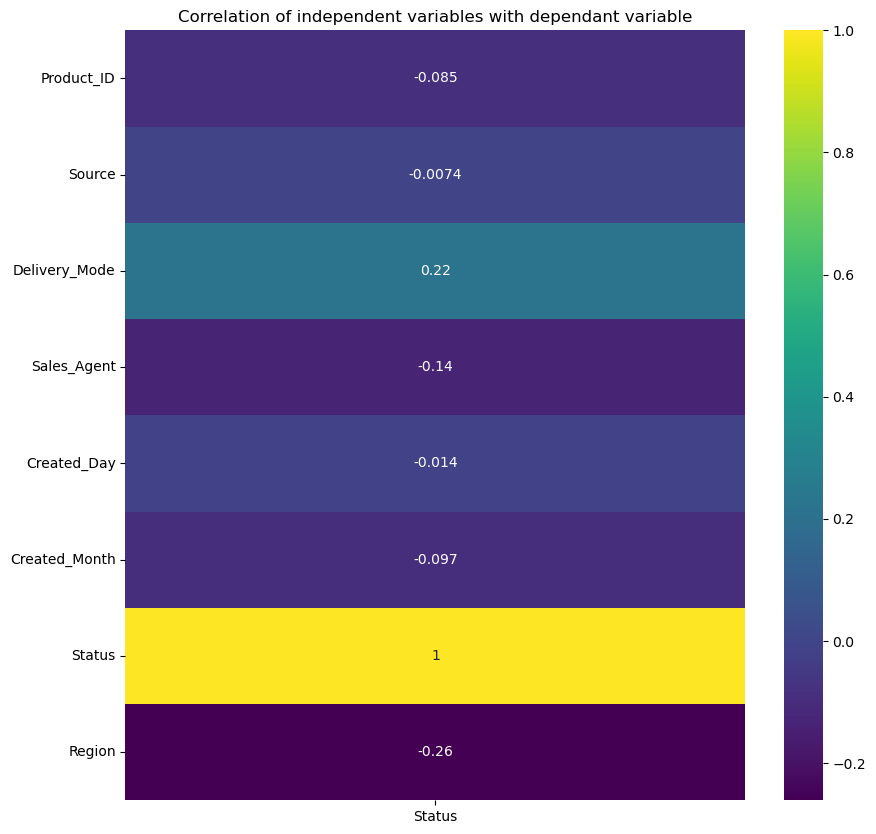

In [96]:
plt.figure(figsize=(10,10))
corr=df.corr()['Status']
corr=pd.DataFrame(corr)
sns.heatmap(corr,annot=True,cmap='viridis')
plt.title('Correlation of independent variables with dependant variable')
plt.show()

#### INSIGHTS OF THE DATA REGARDING THE CORELATION OF FEATURES

**`Product_ID`** vs. **`Status`**: 

There is a negative correlation (-0.085) between `Product_ID` and `Status`.' This suggests that certain product IDs may be associated with a lower sales potential.

**`Source`** vs. **`Delivery_Mode`**: 

There is a negative correlation (-0.206) between `Source` and `Delivery_Mode`. This indicates that different sources may be linked to different delivery modes.

**`Delivery_Mode`** vs. **`Region`**: 

`Delivery_Mode` and `Region` have a strong negative correlation (-0.278). This implies that specific regions may prefer particular delivery modes.

**`Sales_Agent`** vs. **`Delivery_Mode`**: 

There is a negative correlation (-0.224) between `Sales_Agent` and `Delivery_Mode`. Different sales agents may use distinct delivery modes.

**`Created_Day`** vs. **`Created_Month`**: 

`Created_Day` and `Created_Month` have a negative correlation (-0.137). This suggests that the day on which a lead was created may not be strongly related to the month.

**`Status`** vs. **`Region`**: 

`Status` and `Region` are negatively correlated (-0.261). This indicates that certain regions may have a higher proportion of leads categorized as 'LowPotential.'

In [97]:
df.describe()

,Product_ID,Source,Delivery_Mode,Sales_Agent,Created_Day,Created_Month,Status,Region
count,7328.00000,7328.00000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000,7328.000000
mean,15.95101,3.06714,2.093886,5.031114,15.652975,7.482942,0.609443,4.900382
std,6.07565,2.39970,1.738045,2.832403,9.063569,1.868689,0.487908,1.297828
min,0.00000,0.00000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000
25%,12.00000,0.00000,0.000000,3.000000,8.000000,6.000000,0.000000,4.000000
50%,18.00000,4.00000,2.000000,5.000000,15.000000,7.000000,1.000000,6.000000
75%,19.00000,5.00000,4.000000,6.000000,24.000000,9.000000,1.000000,6.000000
max,28.00000,6.00000,4.000000,10.000000,31.000000,11.000000,1.000000,9.000000


In [98]:
df.dtypes

Product_ID       int64
Source           int32
Delivery_Mode    int32
Sales_Agent      int32
Created_Day      int64
Created_Month    int64
Status           int32
Region           int32
dtype: object

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7328 entries, 18 to 7421
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7328 non-null   int64
 1   Source         7328 non-null   int32
 2   Delivery_Mode  7328 non-null   int32
 3   Sales_Agent    7328 non-null   int32
 4   Created_Day    7328 non-null   int64
 5   Created_Month  7328 non-null   int64
 6   Status         7328 non-null   int32
 7   Region         7328 non-null   int32
dtypes: int32(5), int64(3)
memory usage: 372.1 KB


#### SPLITTING THE DATA INTO X AND Y FOR TRAINING AND TESTING  DATA TO BUILD A MODEL 

In [100]:
x=df.drop(['Status'],axis=1)
y=df.Status

In [101]:
x.shape

(7328, 7)

In [102]:
y.shape

(7328,)

The `Status`  feature exhibits an imbalance in its distribution, where one class significantly outweighs the other. To enhance the model's predictive performance, it's imperative to address this class imbalance issue by balancing the dataset, thus leading to improved accuracy scores during model training and evaluation.

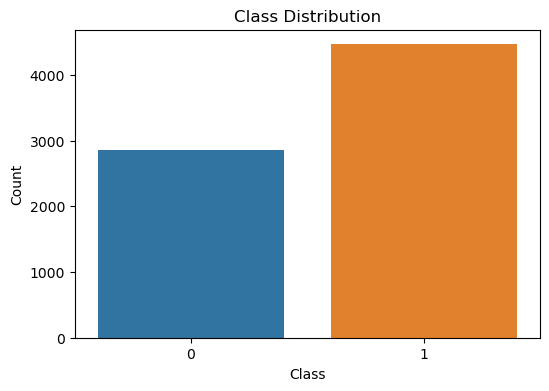

1    4466
0    2862
Name: Status, dtype: int64


In [103]:
# Count the occurrences of each class in the target variable 'y'
class_counts = df['Status'].value_counts()

# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=class_counts.index)  
plt.show()

# Print class distribution counts
print(class_counts)

In [104]:
imbalance_percentage = (df['Status'].sum() / len(df)) * 100

print(f'Imbalance Percentage: {imbalance_percentage:.2f}%')

Imbalance Percentage: 60.94%


#### BALNCING THE DATASET WITH SMOTE

In [105]:
from imblearn.over_sampling import SMOTE

In [106]:
smote=SMOTE(random_state=42)

In [107]:
# Apply SMOTE to balance the classes
x_resampled, y_resampled = smote.fit_resample(x, y)

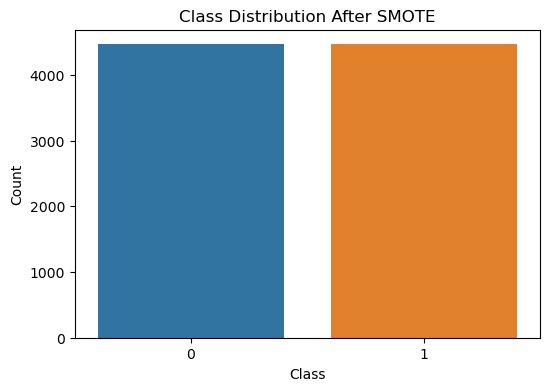

In [108]:
# Count the occurrences of each class in the resampled target variable
class_counts_resampled = pd.Series(y_resampled).value_counts()

# Visualize the class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts_resampled.index, y=class_counts_resampled.values)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=class_counts_resampled.index)
plt.show()

We divide the dataset into two parts: 

`x_train` and `x_test`, which contain the input features, and `y_train` and `y_test`, which contain the target variable. This separation is crucial for both model training and prediction purposes.

In [109]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (7145, 7)
x_test shape: (1787, 7)
y_train shape: (7145,)
y_test shape: (1787,)


Developing a function to facilitate model training and generate essential outputs, including metrics like the confusion matrix, accuracy score, and other relevant performance indicators to evaluate predictions.

Creating a function to train the model saves lot of time and to automate the training and testing process of the ML model

In [110]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def train_and_evaluate_model(model):
    model.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(x_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Generate classification report
    print(f"classification report of {model}  :\n\n",classification_report(y_test, y_pred))

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix of{model}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Create a DataFrame for all metrics
    metrics_df = pd.DataFrame({
        "Accuracy": [accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F1 Score": [f1],
    })

    return metrics_df


#### DecisionTree Classifier

In [111]:
from sklearn.tree import DecisionTreeClassifier

classification report of DecisionTreeClassifier()  :

               precision    recall  f1-score   support

           0       0.72      0.75      0.73       924
           1       0.72      0.69      0.70       863

    accuracy                           0.72      1787
   macro avg       0.72      0.72      0.72      1787
weighted avg       0.72      0.72      0.72      1787



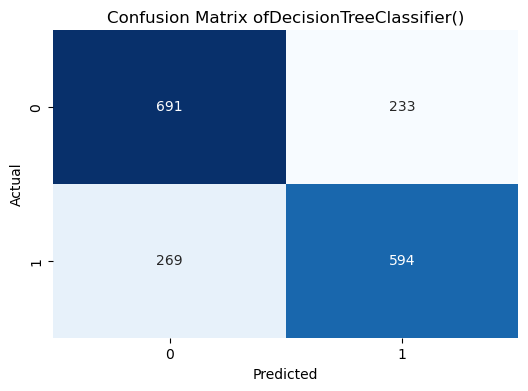

In [112]:
dtree=train_and_evaluate_model(DecisionTreeClassifier())

In [113]:
dtree

,Accuracy,Precision,Recall,F1 Score
0,0.719082,0.718259,0.688297,0.702959


#### Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

classification report of LogisticRegression()  :

               precision    recall  f1-score   support

           0       0.67      0.61      0.64       924
           1       0.62      0.68      0.65       863

    accuracy                           0.64      1787
   macro avg       0.64      0.64      0.64      1787
weighted avg       0.64      0.64      0.64      1787



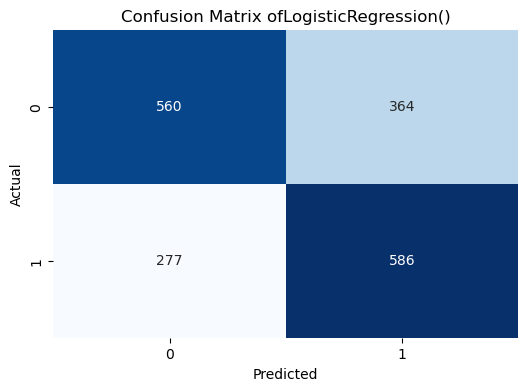

In [115]:
LR=train_and_evaluate_model(LogisticRegression())

In [116]:
LR

,Accuracy,Precision,Recall,F1 Score
0,0.641298,0.616842,0.679027,0.646442


#### Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier

classification report of RandomForestClassifier()  :

               precision    recall  f1-score   support

           0       0.75      0.78      0.76       924
           1       0.75      0.72      0.74       863

    accuracy                           0.75      1787
   macro avg       0.75      0.75      0.75      1787
weighted avg       0.75      0.75      0.75      1787



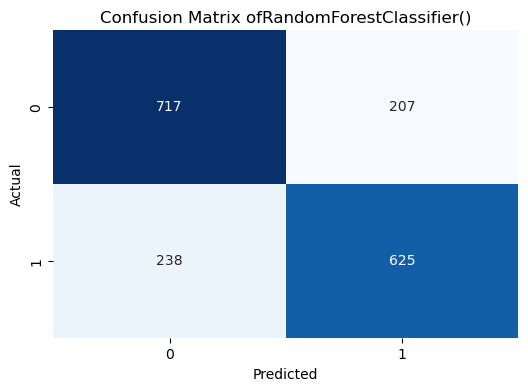

In [118]:
rfc=train_and_evaluate_model(RandomForestClassifier())

In [119]:
rfc

,Accuracy,Precision,Recall,F1 Score
0,0.750979,0.751202,0.724218,0.737463


#### KNeighbours Classifier

In [120]:
from sklearn.neighbors import KNeighborsClassifier

classification report of KNeighborsClassifier()  :

               precision    recall  f1-score   support

           0       0.70      0.76      0.73       924
           1       0.72      0.66      0.69       863

    accuracy                           0.71      1787
   macro avg       0.71      0.71      0.71      1787
weighted avg       0.71      0.71      0.71      1787



C:\Users\THENDRAL\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


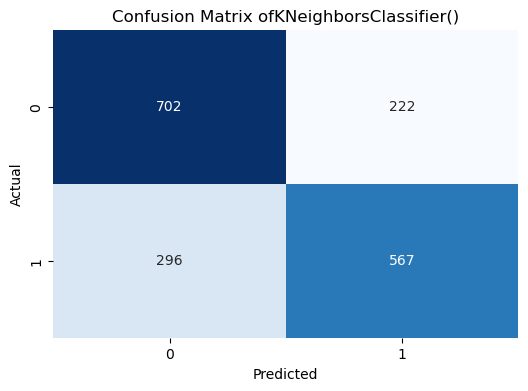

In [121]:
knc=train_and_evaluate_model(KNeighborsClassifier())

In [122]:
knc

,Accuracy,Precision,Recall,F1 Score
0,0.710129,0.718631,0.65701,0.686441


#### Support Vector Classifier

In [123]:
from sklearn.svm import SVC

classification report of SVC(C=10, gamma=0.8)  :

               precision    recall  f1-score   support

           0       0.77      0.67      0.72       924
           1       0.69      0.79      0.74       863

    accuracy                           0.73      1787
   macro avg       0.73      0.73      0.73      1787
weighted avg       0.73      0.73      0.73      1787



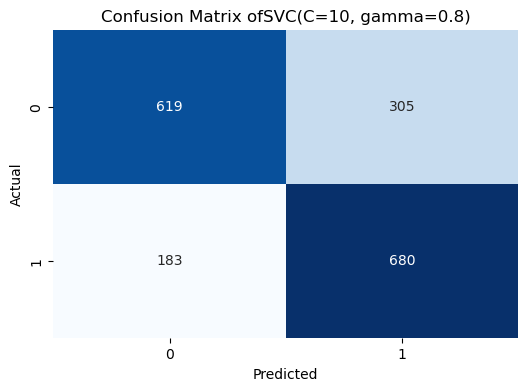

In [124]:
svc=train_and_evaluate_model(SVC(kernel='rbf',C=10, gamma=0.8))

In [125]:
svc

,Accuracy,Precision,Recall,F1 Score
0,0.726917,0.690355,0.787949,0.735931


#### XGB Classifier

In [126]:
from xgboost import XGBClassifier

classification report of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=32, ...)  :

               precision    recall  f1-score   support

           0       0.75      0.77      0.76       924
           1       0.74      0.72      0.73       863

    accuracy                           0.74      1787
   

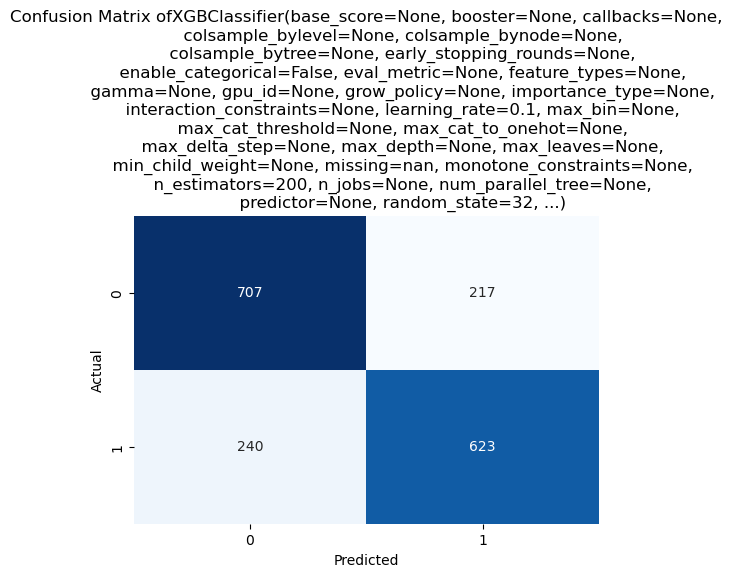

In [127]:
xgb=train_and_evaluate_model(XGBClassifier(learning_rate=0.1,random_state=32,n_estimators=200))

In [128]:
xgb

,Accuracy,Precision,Recall,F1 Score
0,0.744264,0.741667,0.7219,0.73165


In [129]:
from sklearn.model_selection import GridSearchCV

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Test Accuracy: 0.7582540570789031


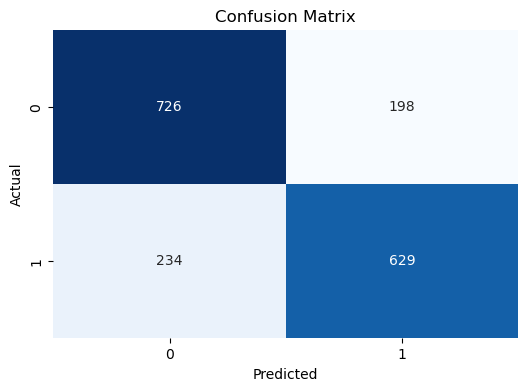

In [130]:
# Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Create the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters from the Grid Search
best_params = grid_search.best_params_

# Create a RandomForestClassifier model with the best hyperparameters
best_rf_classifier = RandomForestClassifier(random_state=42, **best_params)

# Fit the best model to the training data
best_rf_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = best_rf_classifier.predict(x_test)

# Calculate the accuracy of the best model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and the test accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)
 # Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [131]:
import pickle

# Save the trained model to a file
model_filename = 'best_rf_classifier.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_rf_classifier, model_file)

In [132]:
# Load the trained model from the saved file
model_filename = 'best_rf_classifier.pkl'
with open(model_filename, 'rb') as model_file:
       rf_model = pickle.load(model_file)

In [133]:
rf_model

RandomForestClassifier(min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [135]:
y_pred = rf_model.predict(x_test)

    # Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [138]:
# Create a DataFrame for all metrics
rf_metrics = pd.DataFrame({
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1 Score": [f1],
})
rf_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.758254,0.76058,0.728853,0.744379


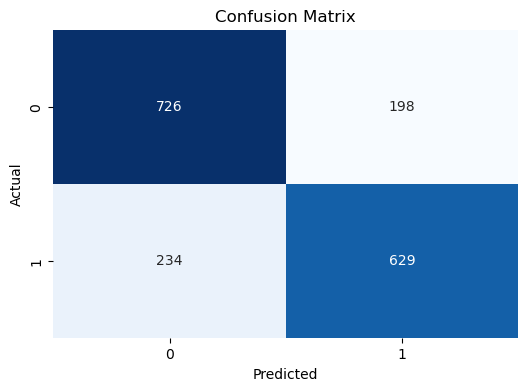

In [137]:
rf_cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 300}
Test Accuracy: 0.7453833240067151


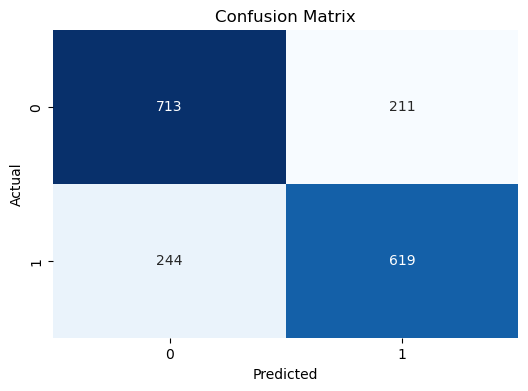

In [139]:
# Define the hyperparameters and their possible values for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
}

# Create the XGBoost Classifier model
xgb_classifier = XGBClassifier(random_state=42)

# Create the Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the Grid Search to the training data
grid_search.fit(x_train, y_train)

# Get the best hyperparameters from the Grid Search
best_params = grid_search.best_params_

# Create an XGBoost Classifier model with the best hyperparameters
best_xgb_classifier = XGBClassifier(random_state=42, **best_params)

# Fit the best model to the training data
best_xgb_classifier.fit(x_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_classifier.predict(x_test)

# Calculate the accuracy of the best model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Print the best hyperparameters and the test accuracy
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [140]:
# Save the trained model to a file
model_filename = 'best_xgb_classifier.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(best_xgb_classifier, model_file)

In [141]:
# Load the trained model from the saved file
model_filename = 'best_xgb_classifier.pkl'
with open(model_filename, 'rb') as model_file:
       xgb_model = pickle.load(model_file)

In [142]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [144]:
y_pred = xgb_model.predict(x_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [145]:
# Create a DataFrame for all metrics
xgb_metrics = pd.DataFrame({
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1 Score": [f1],
})
xgb_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.745383,0.745783,0.717265,0.731246


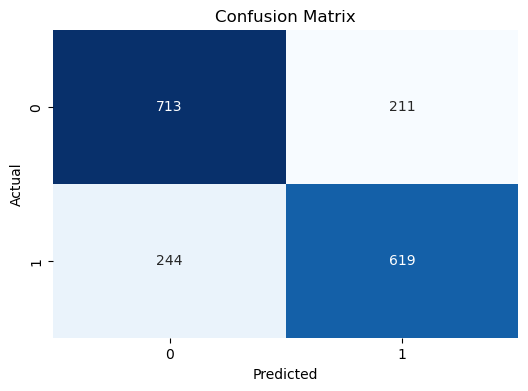

In [146]:
xgb_cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [147]:
# Assuming 'rf_model' is your trained RandomForestClassifier
feature_importances = rf_model.feature_importances_

# Create a DataFrame to associate feature names with their importances
importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

         Feature  Importance
4    Created_Day    0.217063
0     Product_ID    0.196271
6         Region    0.160971
3    Sales_Agent    0.145006
5  Created_Month    0.104707
2  Delivery_Mode    0.093091
1         Source    0.082892


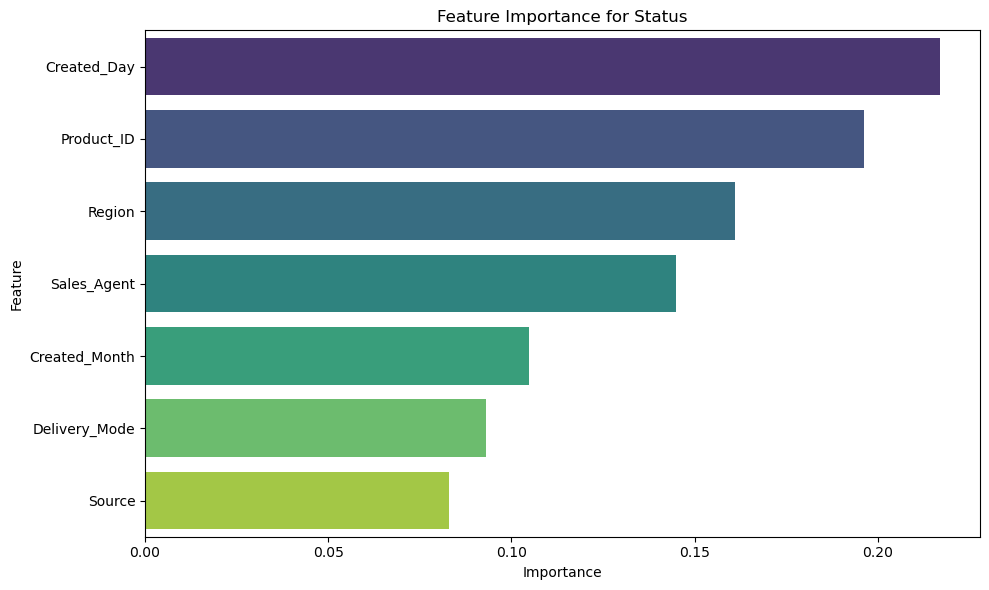

In [148]:
# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Status')
plt.tight_layout()
plt.show()

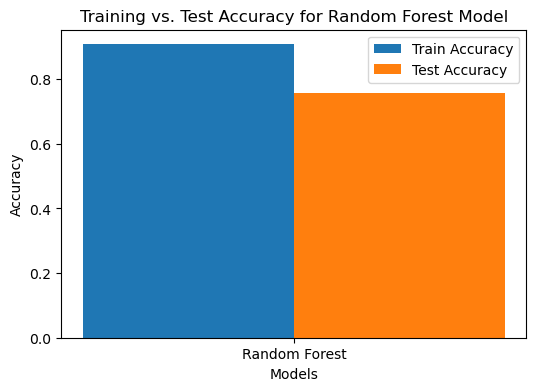

In [149]:
# Initialize lists to store training and test accuracies
train_accuracies = []
test_accuracies = []

# Calculate training and testing accuracy
y_train_pred = rf_model.predict(x_train)
y_test_pred = rf_model.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Append accuracies to the lists
train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

# Plot the training and test accuracies as a bar chart
plt.figure(figsize=(6, 4))
x_labels = ['Random Forest']
x = np.arange(len(x_labels))
width = 0.35
plt.bar(x - width/2, train_accuracies, width, label='Train Accuracy')
plt.bar(x + width/2, test_accuracies, width, label='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy for Random Forest Model')
plt.xticks(x, x_labels)
plt.legend()
plt.show()

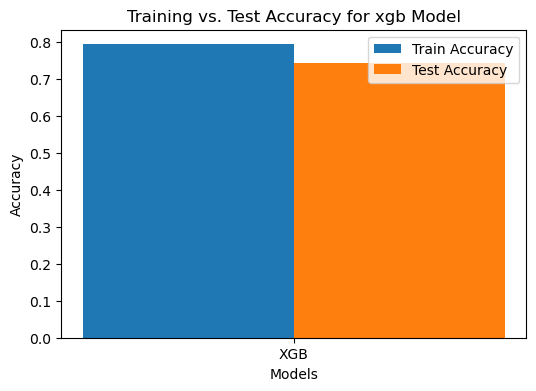

In [150]:
# Initialize lists to store training and test accuracies
train_accuracies = []
test_accuracies = []

# Calculate training and testing accuracy
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Append accuracies to the lists
train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

# Plot the training and test accuracies as a bar chart
plt.figure(figsize=(6, 4))
x_labels = ['XGB']
x = np.arange(len(x_labels))
width = 0.35
plt.bar(x - width/2, train_accuracies, width, label='Train Accuracy')
plt.bar(x + width/2, test_accuracies, width, label='Test Accuracy')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy for xgb Model')
plt.xticks(x, x_labels)
plt.legend()
plt.show()

In [161]:
# Assuming you have three DataFrames: df1, df2, and df3, and you want to add titles
dfs = {'RandomForestClassifier': rf_metrics, 'XGB': xgb_metrics}

# Concatenate the DataFrames along the columns (axis=0) and use the dictionary keys as column names
combined_df = pd.concat(dfs.values(), axis=0, keys=dfs.keys())


In [168]:
combined_df

,,Accuracy,Precision,Recall,F1 Score
RandomForestClassifier,0,0.758254,0.760580,0.728853,0.744379
XGB,0,0.745383,0.745783,0.717265,0.731246


### Model Comparison Report: Sales Effectiveness of FicZon Inc

**Introduction:**

Problem Statement:
- Prepare a Sales_Efectiveness report on the given data.

- Create a predictive model in such a way that the objective is to predict the ordinal variableLead Category (High Potential, Low Potential). This can be extracted from the Status column

- Suggestions to the Buisness to get insights and amke the changes to get better Sales Effectiveness

**Dataset Information:**


- Number of Samples:7422
- Number of Features: 9
- Target Variable:Status

**Model Selection:**

- DecisionTreeClassifier
- LogisticRegression
- RandomForestClassifier
- KNeighborsClassifier
- SVC
- XGBClassifier
- Hyper ParameterTuned RandomForestClassifier
- Hyper ParameterTuned XGBClassifier

**Model Evaluation Metrics**:
- precision    
- recall  
- f1-score   
- accuracy_score

**Results**:

- Model 1 (**DecisionTreeClassifier**):
    -  precision : 0.718
    -  recall  : 0.688
    -  f1-score: 0.702
    - accuracy_score: 0.719

- Model 2 (**LogisticRegression**):
    -  precision :0.616 
    -  recall  : 0.679
    -  f1-score: 0.646     
    - accuracy_score: 0.641

- Model 3 (**RandomForestClassifier**):
    -  precision : 0.751      
    -  recall  : 0.724      
    -  f1-score: 0.737     
    - accuracy_score: 0.750

- Model 4 (**KNeighborsClassifier**):
    -  precision : 0.718
    -  recall  : 0.657
    -  f1-score: 0.686
    - accuracy_score: 0.710

- Model 5 (**SVC**):
    -  precision : 0.690
    -  recall  : 0.787
    -  f1-score: 0.735
    - accuracy_score: 0.726

- Model 6 (**XGBClassifier**):
    -  precision : 0.741
    -  recall  : 0.721
    -  f1-score: 0.731
    - accuracy_score: 0.744
 
- Model 7 (**Hyper ParameterTuned RandomForestClassifier**):
    -  precision : 0.760
    -  recall  : 0.728
    -  f1-score: 0.744
    - accuracy_score: 0.758

- Model 8 (**Hyper ParameterTuned XGBClassifier**):
    -  precision : 0.745
    -  recall  : 0.717
    -  f1-score: 0.731
    - accuracy_score: 0.7453
    
**Future Improvements**:

- **Enhanced Sales Agent Metrics**: Implement a comprehensive performance tracking system for sales agents, incorporating lead conversion rates, response times, and customer feedback to provide a holistic view of their effectiveness.
- **Predictive Lead Scoring**: Develop a predictive lead scoring model using historical data and machine learning techniques to prioritize high-potential leads, enabling targeted and efficient sales efforts.
- **Product-Specific Campaigns**: Tailor marketing campaigns to individual products based on their performance and customer preferences, ensuring that the right message reaches the right audience.
- **Source Optimization**: Continuously analyze the effectiveness of lead sources and allocate resources to the most productive channels, optimizing the cost of acquisition and lead quality.
- **Geographic Targeting**: Implement geo-targeting strategies to focus sales and marketing efforts on regions with higher lead potential, aligning with regional performance variations.

- **Missing Data**: We can Potentially Update Data from the Features like **`Product-ID`** missing in **`51 Rows`**,**`Sales_Agent`** missing in **`16 Rows`**.We can also update **`Location `** of the **HighPotential** Clients   
and **`Source `** of the **HighPotential** Clients by simply asking them. The total Missing data from Location and Source are **`61 `**.The **Total Missing Value Count** is  **`128`**

**Conclusion**:

  Based on the evaluation results, the Hyper-Tuned Random Search RandomForestRegressor is recommended as the optimal model for predicting Lead Category (High Potential, Low Potential)
 

**Limitations**:

- **Data Quality Challenges**: The dataset may suffer from inaccuracies, missing values, or inconsistencies, affecting the reliability of insights and decisions.

- **Lack of Contextual Information**: The absence of contextual information, such as the nature of products or sources, hinders a deeper understanding of performance drivers.

- **Limited Granularity**: The dataset provides a high-level overview, lacking detailed information about individual leads, sales agents, or products, limiting the depth of analysis.

- **Incomplete Attribution**: The dataset lacks attribution of leads to specific marketing campaigns or customer interactions, making it challenging to assess the effectiveness of these efforts.

- **Data Age and Relevance**: The dataset's knowledge cutoff date in September 2021 may not reflect recent changes in the business environment, potentially impacting the applicability of insights to current operations.

#### Analysis of the Project

The project aims to analyze and derive insights from a dataset related to lead generation and sales effectiveness. It involves evaluating the performance of sales agents, products, sources, locations, and delivery modes. Key findings include identifying top performers, product performance variations, source effectiveness, and regional influences. Recommendations may include focusing on high-potential products, optimizing lead sources, and tailoring strategies for specific locations. Limitations include potential data quality issues and the need for real-time data integration for more dynamic decision-making.

#### DATA ANALYSIS 

In [3]:
connection=mysql.connector.connect(host="18.136.157.135",user="dm_team2",password="DM!$Team&27@9!20!",database="project_sales")

In [5]:
query=('select * from data')

In [6]:
df=pd.read_sql_query(query,connection)

C:\Users\THENDRAL\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [7]:
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [8]:
df.shape

(7422, 9)

In [175]:
df['Sales_Agent'].value_counts()

Sales-Agent-4     1500
Sales-Agent-11    1420
Sales-Agent-5     1190
Sales-Agent-9      879
Sales-Agent-3      781
Sales-Agent-7      736
Sales-Agent-2      389
Sales-Agent-12     269
Sales-Agent-6      114
Sales-Agent-8       68
Sales-Agent-10      49
                    23
Sales-Agent-1        4
Name: Sales_Agent, dtype: int64

In [176]:
df.Status.replace(['converted','CONVERTED','In Progress Positive','Potential','Long Term','Open'],'HighPotential',inplace=True)
df.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'LowPotential',inplace=True)

In [183]:
df.Status.value_counts()

LowPotential     4491
HighPotential    2931
Name: Status, dtype: int64

In [219]:
def count_status_by_agents(df):
    agent_counts = {}
    
    # Get the unique Sales_Agent values
    unique_agents = df['Sales_Agent'].unique()
    
    for agent_name in unique_agents:
        filtered_df = df[df['Sales_Agent'] == agent_name]
        status_counts = filtered_df['Status'].value_counts()
        high_potential_count = status_counts.get('HighPotential', 0)
        low_potential_count = status_counts.get('LowPotential', 0)
        total_status_count=high_potential_count+low_potential_count
        
        agent_counts[agent_name] = {
            'HighPotential': high_potential_count,
            'LowPotential': low_potential_count,
            'TotalStatusCount':total_status_count
        }
    
    # Sort the Sales Agents based on HighPotential count in descending order
    sorted_agents = sorted(agent_counts.items(), key=lambda x: x[1]['HighPotential'], reverse=True)
    
    # Create a DataFrame from the sorted list
    df_sorted_agents = pd.DataFrame(sorted_agents, columns=['Sales_Agent', 'Counts'])
    
    # Split the 'Counts' column into 'HighPotential' and 'LowPotential'
    df_sorted_agents[['HighPotential', 'LowPotential','TotalStatusCount']] = df_sorted_agents['Counts'].apply(pd.Series)
    
    # Drop the 'Counts' column
    df_sorted_agents = df_sorted_agents.drop(columns=['Counts'])
    
    return df_sorted_agents

# Example usage:
# Assuming you have a DataFrame called 'df' containing your data
df_sorted_agents = count_status_by_agents(df)

# Print the sorted DataFrame with proper labels
print(df_sorted_agents.to_string(index=False))


   Sales_Agent  HighPotential  LowPotential  TotalStatusCount
 Sales-Agent-9            558           321               879
 Sales-Agent-4            547           953              1500
Sales-Agent-11            497           923              1420
 Sales-Agent-7            319           417               736
 Sales-Agent-5            312           878              1190
 Sales-Agent-3            280           501               781
 Sales-Agent-2            173           216               389
Sales-Agent-12             82           187               269
 Sales-Agent-6             60            54               114
Sales-Agent-10             44             5                49
 Sales-Agent-8             39            29                68
                           16             7                23
 Sales-Agent-1              4             0                 4


####  SALES_AGENT PERFORMANCE OVERVIEW


**Top Performers**: Sales agents like `Sales-Agent-9`, `Sales-Agent-4`, and `Sales-Agent-11` have a relatively high count of 'HighPotential' status, indicating that they are successful in generating high-potential leads.

**Consistent Performance**: Some sales agents, like `Sales-Agent-7`, `Sales-Agent-5`, and `Sales-Agent-3`, have a balanced count of both 'HighPotential' and 'LowPotential' status, suggesting a consistent performance in lead generation.

**Lower Performance**: `Sales-Agent-10`, with a lower count of 'HighPotential' and 'TotalStatusCount', may need improvement in generating high-potential leads.

**Low Activity**: `Sales-Agent-1` has a low 'TotalStatusCount', which might indicate lower activity or fewer leads generated.

**Unknown**: There are entries with no 'Sales_Agent' specified, indicated by an empty row. These entries have a total status count of 23, but the performance of individual agents is not known.

In [218]:
def count_status_by_product(df):
    product_counts = {}
    
    # Get the unique Product_ID values
    unique_products = df['Product_ID'].unique()
    
    for product_name in unique_products:
        filtered_df = df[df['Product_ID'] == product_name]
        status_counts = filtered_df['Status'].value_counts()
        high_potential_count = status_counts.get('HighPotential', 0)
        low_potential_count = status_counts.get('LowPotential', 0)
        total_status_count = high_potential_count + low_potential_count
        
        product_counts[product_name] = {
            'HighPotential': high_potential_count,
            'LowPotential': low_potential_count,
            'TotalStatusCount': total_status_count
        }
    
    # Sort the Product_IDs based on HighPotential count in descending order
    sorted_products = sorted(product_counts.items(), key=lambda x: x[1]['HighPotential'], reverse=True)
    
    # Create a DataFrame from the sorted list
    df_sorted_products = pd.DataFrame(sorted_products, columns=['Product_ID', 'Counts'])
    
    # Split the 'Counts' column into 'HighPotential' and 'LowPotential'
    df_sorted_products[['HighPotential', 'LowPotential','TotalStatusCount']] = df_sorted_products['Counts'].apply(pd.Series)
    
    # Drop the 'Counts' column
    df_sorted_products = df_sorted_products.drop(columns=['Counts'])
    
    return df_sorted_products

# Example usage:
# Assuming you have a DataFrame called 'df' containing your data
df_sorted_products = count_status_by_product(df)

# Print the sorted DataFrame with proper labels
print(df_sorted_products.to_string(index=False))


Product_ID  HighPotential  LowPotential  TotalStatusCount
        18            837           874              1711
        19            660           529              1189
         9            493           499               992
        27            332           407               739
         5            158           329               487
        15             98          1420              1518
        10             96            72               168
        20             60            42               102
                       51             7                58
        25             37            53                90
        21             31            35                66
         1             20            85               105
        26             15            16                31
         2             14            24                38
        12             12            24                36
         3              4             3                 7
        11    

####  PRODUCTS PERFORMANCE OVERVIEW

**Top-Performing Products**: Products with 'Product_ID' `18`, `19`, and `9` have the highest 'TotalStatusCount', indicating that they are associated with a significant number of leads or sales opportunities. These products also have a substantial count of 'HighPotential' leads, suggesting their potential for generating high-quality leads.

**Mixed Performance**: Some products, such as 'Product_ID' `15` and `10`, have a high 'TotalStatusCount,' but a significant portion of these leads falls into the 'LowPotential' category. This indicates that while these products generate a large volume of leads, they may not be as effective at producing high-quality leads.

**Low Engagement**: Out Of 30 products 18 Products have a 'TotalStatusCount' very low values. These products may not be generating many leads or may have limited engagement with potential customers.

**Balanced Ratio**: Some products, like 'Product_ID' `3`, `11`, and `6`, have a balanced ratio of 'HighPotential' to 'LowPotential' leads. This suggests a consistent performance in generating leads with potential.

**High 'LowPotential' Counts**: Products like 'Product_ID' `15` and `18` have a high count of 'LowPotential' leads. This could indicate that they attract a broad range of leads, including those with lower potential.

**Limited 'HighPotential'**: Some products, like 'Product_ID' `23`, `16`, and `14`, have a 'HighPotential' count of zero or very low values. This implies that these products may not be very effective at generating high-potential leads.

**Unknown**: There are entries with no 'Product_ID' specified, indicated by empty rows. These entries have a total status count of 58, but the performance of individual products is not known.

In [217]:
def count_status_by_source(df):
    source_counts = {}
    
    # Get the unique Source values
    unique_sources = df['Source'].unique()
    
    for source_name in unique_sources:
        filtered_df = df[df['Source'] == source_name]
        status_counts = filtered_df['Status'].value_counts()
        high_potential_count = status_counts.get('HighPotential', 0)
        low_potential_count = status_counts.get('LowPotential', 0)
        total_status_count = high_potential_count + low_potential_count
        
        source_counts[source_name] = {
            'HighPotential': high_potential_count,
            'LowPotential': low_potential_count,
            'TotalStatusCount': total_status_count
        }
    
    # Sort the Source names based on HighPotential count in descending order
    sorted_sources = sorted(source_counts.items(), key=lambda x: x[1]['HighPotential'], reverse=True)
    
    # Create a DataFrame from the sorted list
    df_sorted_sources = pd.DataFrame(sorted_sources, columns=['Source', 'Counts'])
    
    # Split the 'Counts' column into 'HighPotential' and 'LowPotential'
    df_sorted_sources[['HighPotential', 'LowPotential','TotalStatusCount']] = df_sorted_sources['Counts'].apply(pd.Series)
    
    # Drop the 'Counts' column
    df_sorted_sources = df_sorted_sources.drop(columns=['Counts'])
    
    return df_sorted_sources

# Example usage:
# Assuming you have a DataFrame called 'df' containing your data
df_sorted_sources = count_status_by_source(df)

# Print the sorted DataFrame with proper labels
print(df_sorted_sources.to_string(index=False))


                       Source  HighPotential  LowPotential  TotalStatusCount
                         Call            933          1614              2547
             Live Chat-Direct            725          1109              1834
                      Website            606           988              1594
            Customer Referral            161            19               180
     Live Chat-Google Organic            124           150               274
               Live Chat -PPC             96           153               249
               Live Chat-Blog             76           161               237
              Existing Client             48             3                51
             Personal Contact             39            11                50
            By Recommendation             29             3                32
            Existing Customer             20             2                22
                    Just Dial             14            42                56

#### SOURCE EFFECTIVENESS SUMMARY:

**Top Sources**: The top-performing sources in terms of 'TotalStatusCount' are `Call`, `Live Chat-Direct`, and `Website`. These sources generate a significant number of leads or sales opportunities.

**High 'LowPotential' Counts**: Some sources, such as `Call`,`Live Chat-Direct` and `Website`, also have high counts of 'LowPotential' leads. This suggests that while they generate a large volume of leads, they may also attract leads with lower potential.

**Diverse Sources**: There are various sources listed, including `Customer Referral`,`Live Chat-Google Organic`,`Live Chat -PPC`,`Existing Client`,`Personal Contact`, and others. Each source has a different mix of 'HighPotential' and 'LowPotential' leads.

**Low 'LowPotential' Counts**: Some sources, like `E-Mail Message`,`Live Chat-Quora`,`Other`, and `SMS Campaign` have very few or no 'LowPotential' leads. This indicates that they tend to attract leads with higher potential.

**Mixed Performance**: Some sources, such as `Campaign` and `CRM form`, have a mix of 'HighPotential' and 'LowPotential' leads. The balance between these two types of leads may vary for different sources.

**Unknown Source**: There is an entry with an empty 'Source' field, indicating an unknown or unspecified source. This entry has a 'TotalStatusCount' of 17, but the performance of individual sources is not known.

In [216]:
def count_status_by_location(df):
    location_counts = {}
    
    # Get the unique Location values
    unique_locations = df['Location'].unique()
    
    for location_name in unique_locations:
        filtered_df = df[df['Location'] == location_name]
        status_counts = filtered_df['Status'].value_counts()
        high_potential_count = status_counts.get('HighPotential', 0)
        low_potential_count = status_counts.get('LowPotential', 0)
        total_status_count = high_potential_count + low_potential_count
        
        location_counts[location_name] = {
            'HighPotential': high_potential_count,
            'LowPotential': low_potential_count,
            'TotalStatusCount': total_status_count
        }
    
    # Sort the Location names based on HighPotential count in descending order
    sorted_locations = sorted(location_counts.items(), key=lambda x: x[1]['HighPotential'], reverse=True)
    
    # Create a DataFrame from the sorted list
    df_sorted_locations = pd.DataFrame(sorted_locations, columns=['Location', 'Counts'])
    
    # Split the 'Counts' column into 'HighPotential' and 'LowPotential'
    df_sorted_locations[['HighPotential', 'LowPotential','TotalStatusCount']] = df_sorted_locations['Counts'].apply(pd.Series)
    
    # Drop the 'Counts' column
    df_sorted_locations = df_sorted_locations.drop(columns=['Counts'])
    
    return df_sorted_locations

# Example usage:
# Assuming you have a DataFrame called 'df' containing your data
df_sorted_locations = count_status_by_location(df)

# Print the sorted DataFrame with proper labels
print(df_sorted_locations.to_string(index=False))


       Location  HighPotential  LowPotential  TotalStatusCount
      Bangalore           1271           813              2084
        Chennai            461           448               909
Other Locations            453          2047              2500
      Hyderabad            206           322               528
          Delhi            165           306               471
         Mumbai            142           260               402
                            50             8                58
           Pune             45            97               142
            UAE             39            40                79
     Trivandrum             22            36                58
             UK             20            21                41
            USA             18            27                45
        Kolkata             13            42                55
      AUSTRALIA             10            15                25
      Singapore              9             8           

#### Location Performance Overview:

**Top Locations**: The top-performing locations in terms of 'TotalStatusCount' are `Bangalore`,`Other Locations`, and `Chennai`. These locations have the highest number of leads or sales opportunities.

**High 'LowPotential' Counts**: `Other Locations` have a very high count of 'LowPotential' leads, which is significantly higher than any other location. This suggests that while it generates a large volume of leads, it also attracts leads with lower potential.

**Diverse Locations**: There are various locations listed, including major Indian cities like `Hyderabad`,`Delhi`,`Mumbai`,`Pune`, and international locations like `UAE`,`UK`,`USA`,`AUSTRALIA`,`Singapore`,`Malaysia`,`EUROPE` and `Howrah`. Each location has a different mix of 'HighPotential' and 'LowPotential' leads.

**Low 'LowPotential' Counts**: Some locations, such as `Singapore`,`Malaysia` and `EUROPE`, have very few or no 'LowPotential' leads. This indicates that they tend to attract leads with higher potential.

**Mixed Performance**: Locations like `Delhi` and `Mumbai` have a mix of 'HighPotential' and 'LowPotential' leads. The balance between these two types of leads may vary for different locations.

**Unknown Location**: There is an entry with an empty 'Location' field, indicating an unknown or unspecified location. This entry has a 'TotalStatusCount' of 58, but the performance of individual locations is not known.

In [220]:
def count_status_by_delivery_mode(df):
    delivery_mode_counts = {}
    
    # Get the unique Delivery_Mode values
    unique_delivery_modes = df['Delivery_Mode'].unique()
    
    for mode_name in unique_delivery_modes:
        filtered_df = df[df['Delivery_Mode'] == mode_name]
        status_counts = filtered_df['Status'].value_counts()
        high_potential_count = status_counts.get('HighPotential', 0)
        low_potential_count = status_counts.get('LowPotential', 0)
        total_status_count = high_potential_count + low_potential_count  # Calculate the total count
        
        delivery_mode_counts[mode_name] = {
            'HighPotential': high_potential_count,
            'LowPotential': low_potential_count,
            'TotalStatusCount': total_status_count  # Include the total count in the output
        }
    
    # Sort the Delivery_Mode names based on HighPotential count in descending order
    sorted_modes = sorted(delivery_mode_counts.items(), key=lambda x: x[1]['HighPotential'], reverse=True)
    
    # Create a DataFrame from the sorted list
    df_sorted_modes = pd.DataFrame(sorted_modes, columns=['Delivery_Mode', 'Counts'])
    
    # Split the 'Counts' column into 'HighPotential', 'LowPotential', and 'TotalStatusCount'
    df_sorted_modes[['HighPotential', 'LowPotential', 'TotalStatusCount']] = df_sorted_modes['Counts'].apply(pd.Series)
    
    # Drop the 'Counts' column
    df_sorted_modes = df_sorted_modes.drop(columns=['Counts'])
    
    return df_sorted_modes

# Example usage:
# Assuming you have a DataFrame called 'df' containing your data
df_sorted_modes = count_status_by_delivery_mode(df)

# Print the sorted DataFrame with proper labels
print(df_sorted_modes.to_string(index=False))


Delivery_Mode  HighPotential  LowPotential  TotalStatusCount
       Mode-1           1337          1290              2627
       Mode-5            802          2173              2975
       Mode-3            703           985              1688
       Mode-4             82            39               121
       Mode-2              7             4                11


#### Mode of Delivery Performance Overview

**Mode-1**: 'Mode-1' has the `Highest 'TotalStatusCount'` among all delivery modes, indicating it is the most frequently used delivery mode for generating leads or sales opportunities. However, it also has a relatively `High count of LowPotential` leads.

**Mode-5**: 'Mode-5' has the `Second-highest 'TotalStatusCount'` but stands out with a `significant count of 'LowPotential'` leads. This suggests that while it generates a large volume of leads, a substantial portion of them may have lower potential.

**Mode-3**: 'Mode-3' has a `Moderate 'TotalStatusCount`' and a balanced distribution of `'HighPotential' and 'LowPotential'` leads. It appears to be a mode that generates a mix of lead qualities.

**Mode-4**: 'Mode-4' has the `Lowest 'TotalStatusCount'` among all modes, indicating it is the least frequently used delivery mode. However, it has a low count of 'LowPotential' leads, suggesting that it may be more effective in attracting leads with higher potential.

**Mode-2**: 'Mode-2' has a `Very low 'TotalStatusCount'` and a small number of `'HighPotential' and 'LowPotential'` leads. It is the least utilized mode in terms of lead generation.

In [222]:
def extract_month_from_created(df):
    # Convert 'Created' column to datetime format
    df['Created'] = pd.to_datetime(df['Created'], format='%d-%m-%Y %H:%M')
    
    # Extract month from the 'Created' column
    df['Month'] = df['Created'].dt.month
    
    month_counts = {}
    
    # Get the unique months
    unique_months = df['Month'].unique()
    
    for month in unique_months:
        filtered_df = df[df['Month'] == month]
        status_counts = filtered_df['Status'].value_counts()
        high_potential_count = status_counts.get('HighPotential', 0)
        low_potential_count = status_counts.get('LowPotential', 0)
        total_status_count = high_potential_count + low_potential_count
        
        month_counts[month] = {
            'HighPotential': high_potential_count,
            'LowPotential': low_potential_count,
            'TotalStatusCount': total_status_count
        }
    
    # Sort the months based on HighPotential count in descending order
    sorted_months = sorted(month_counts.items(), key=lambda x: x[1]['HighPotential'], reverse=True)
    
    # Create a DataFrame from the sorted list
    df_sorted_months = pd.DataFrame(sorted_months, columns=['Month', 'Counts'])
    
    # Split the 'Counts' column into 'HighPotential', 'LowPotential', and 'TotalStatusCount'
    df_sorted_months[['HighPotential', 'LowPotential', 'TotalStatusCount']] = df_sorted_months['Counts'].apply(pd.Series)
    
    # Drop the 'Counts' column
    df_sorted_months = df_sorted_months.drop(columns=['Counts'])
    
    return df_sorted_months

# Example usage:
# Assuming you have a DataFrame called 'df' containing your data
df_sorted_months = extract_month_from_created(df)

# Print the sorted DataFrame with proper labels
print(df_sorted_months.to_string(index=False))

 Month  HighPotential  LowPotential  TotalStatusCount
     9            493           610              1103
    10            460           540              1000
     6            456           829              1285
     5            429           831              1260
     8            421           698              1119
     7            408           749              1157
    11            216           167               383
     4             48            67               115


#### Created_Month PERFORMANCE OVERVIEW:

**Seasonal Variations**: The data indicates that there are some seasonal variations in lead generation. For example, the months of `June` ('6'), `May` ('5'), and `August` ('8') have relatively higher counts of both 'HighPotential' and 'LowPotential' leads. This could suggest that these months are more active in terms of lead generation.

**Steady Performance**: Months like `September` ('9'), `October` ('10'), and `July` ('7') demonstrate a consistent performance in generating leads with similar counts of 'HighPotential' and 'LowPotential' leads. This balanced performance suggests that the quality of leads remains relatively stable during these months.

**Decline in November**: In `November` ('11'), there is a noticeable drop in lead generation, with a lower count of both 'HighPotential' and 'LowPotential' leads. This might be due to factors such as holidays or decreased business activity.

**Low Activity in April**: `April` ('4') appears to have the lowest lead generation activity, with the lowest counts of both 'HighPotential' and 'LowPotential' leads. This could be indicative of a quieter period for lead generation.


In [204]:
# Function to count missing values by status
def count_missing_by_status(df, column):
    missing_counts = {
        'HighPotential': df[(df['Status'] == 'HighPotential') & (df[column] == '')].shape[0],
        'LowPotential': df[(df['Status'] == 'LowPotential') & (df[column] == '')].shape[0]
    }
    return missing_counts

# Get the list of columns in your DataFrame
columns = df.columns

# Create a dictionary to store missing value counts for each column
missing_value_counts = {}

# Loop through columns and count missing values by status
for column in columns:
    missing_value_counts[column] = count_missing_by_status(df, column)

# Convert the dictionary into a DataFrame
missing_value_df = pd.DataFrame(missing_value_counts)

# Transpose the DataFrame for a better view
missing_value_df = missing_value_df.transpose()

# Print the missing value counts by column
print(missing_value_df)

               HighPotential  LowPotential
Created                    0             0
Product_ID                51             7
Source                    11             6
Mobile                   630          1180
EMAIL                      0             0
Sales_Agent               16             7
Location                  50             8
Delivery_Mode              0             0
Status                     0             0


#### SALES PERFORMANCE SNAPSHOT: KEY INSIGHTS AND EFFECTIVENESS SUMMARY

#### Sales Agents Insights:

- **Top performers** include **`Sales-Agent-9`**,**`Sales-Agent-4`** and **`Sales-Agent-11`** with a focus on **High-potential leads**.
-  **`Sales-Agent-7`**,**`Sales-Agent-5`**,**`Sales-Agent-3`** maintain **Consistent performance** in both **'HighPotential' and 'LowPotential'** leads.
- **`Sales-Agent-10`** has **Room for improvement** in generating **High-potential leads**.
- **`Sales-Agent-1`** appears to have **Lower activity or Fewer leads**.
- **`Entries with no specified 'Sales_Agent'`** are present with `23` total status counts, but individual agent performances are unknown.

#### Products Insights:

- **Leading products** like 'Product_ID' **`18`**, **`19`** and **`9`** excel in both **High 'TotalStatusCount'** and **'HighPotential' leads**.
- Some products like **`27`**,**`5`**,**`15`**,**`10`**,**`20`**,**`1`** **Generate High total counts** but **Need improvement** in **Lead quality**.
-  **`8`**,**`22`**,**`24`**,**`13`**,**`17`**,**`6`**,**`11`**,**`3`** these Products have **Limited engagement** and **Generate fewer leads**.
- **Balanced ratios** of **'HighPotential' to 'LowPotential' leads** exist in some products like **`Unnamed`**,**`25`**,**`21`**,**`26`**,**`2`** and **`12`**
- Some products like **`15`** attract a broad range of leads, create **'1420 -LowPotential Sales'** out of **'1518-Total sales'**.
- Some Products like **`4`**,**`7`**,**`28`**,**`0`**,**`14`**,**`23`** and **`16`**. **Only Brings LowPotential Sales**, they **Didn't bring any HighPotential Sales** and they only have Total Sales in single digits. 

#### Sources Insights:

- Top sources, such as **`Call`**,**`Live Chat-Direct`** and **`Website`**, contribute significantly to 'TotalStatusCount'. While these sources generate high counts, they also attract 'LowPotential' leads.
- A variety of sources like **`Live Chat-Google Organic`**,**`Live Chat-PPC`** and **`Live Chat-Blog`** are available, each with a **Distinct mix of lead qualities**.
- Sources like **`Existing Client`**,**`Existing Customer`**,**`Personal Contact`**,**`By Recommendation`** and **`Customer Refferal`** focus on **Attracting High potential leads**.
- Mixed performance in sources like **`Just Dial`**,**`Live Chat-CPC`** and **`Unnamed Source`** have both 'HighPotential' and 'LowPotential' leads.
-  Variety of Sources like **`Campaign`**,**`CRM forms`**,**`Live Chat-Google Ads`**,**`E-mail Campaign`** and **`E-Mail Campaign`** Drives **Low  High Potential Sales** 
- Sources that drive only **Single-Digit in Sales**  are  **`Live-Chat Adwords Remarketing`**,**`US website`**,**`E-Mail Message`**,**`Live-Chat Quora`**,**`Other`** and **`SMS Campaign`**
- Source that drives **Only-Low Potential Sales** are **`Live-Chat Youtube`** and **`Live-Chat JustDial`**
- An entry with an empty 'Source' field indicates an **unknown** or unspecified source has a **Total of 17 Sales**.

#### Locations Insights:

- Key locations like **`Bangalore`**,**`Other Locations`** and **`Chennai`** **Lead in 'TotalStatusCount**.
- **`Other Locations`** exhibit a **High count of 'LowPotential' leads**.
- **Diverse Geographies**: Various locations, including major **Indian cities** like **`Hyderabad`**,**`Delhi`**,**`Mumbai`**,**`Pune`**, and **international locations** like **`UAE`**,**`UK`**,**`USA`**,**`AUSTRALIA`**,**`Singapore`**,**`Malaysia`**,**`EUROPE`** contribute to lead generation with varying potential levels. 

- **No Potential Lead**: **`Howrah`** have the **Least amount of TotalSales** Count and **Doesnt bring any HighPotential Sales**.

- **Limited 'LowPotential' Leads**: Some locations, such as **`Singapore`**,**`Malaysia`** and **`EUROPE`**, have **Very few or no 'LowPotential' leads**, indicating a tendency to **Attract leads with higher potential***.

- **Unknown Location**: An entry with an empty 'Location' field has a 'TotalStatusCount' of **58**, but the performance of individual locations is unknown."

#### Delivery Modes Insights:

- **`Mode-1`** is the **Most frequently used delivery mode**, but it also has a **High count of 'LowPotential' leads**.
- **`Mode-5`** ranks **Second in 'TotalStatusCount'** but with **High 'LowPotential'** leads of the all Modes.
- **`Mode-3`** has a **Moderate 'TotalStatusCount'** and **Balanced 'HighPotential' and 'LowPotential'** leads.
- **`Mode-4`** is the **Least used** mode but **Attracts fewer 'LowPotential'** leads.
- **`Mode-2`** records **Minimal activity** with **Low 'TotalStatusCount'** and **'HighPotential'** leads.


#### Created_Month Insights:

- **September Performance**: **`September`** stands out as a strong month for lead generation with 1103 total leads. This month maintains a relatively balanced ratio of 'HighPotential' (493) and 'LowPotential' (610) leads.

- **October Consistency**: **`October`** maintains consistent lead activity with a total of 1000 leads, evenly split between 'HighPotential' (460) and 'LowPotential' (540) categories.

- **June and May Momentum**: **`June`** (1285 total) and **`May`** (1260 total) exhibit robust lead generation, but with a higher number of 'LowPotential' leads, suggesting potential areas for improvement.

- **August Activity**: **`August`** records 1119 total leads, evenly divided between 'HighPotential' (421) and 'LowPotential' (698) leads, indicating steady performance.

- **July Balance**: **`July`** generates 1157 leads, with nearly equal counts of 'HighPotential' (408) and 'LowPotential' (749) leads, maintaining a balanced lead distribution.

- **November Decline**: **`November`** records the lowest lead activity with 383 total leads, with 'HighPotential' leads (216) surpassing 'LowPotential' leads (167).

- **April Lull**: April has the lowest lead count (115 total), primarily consisting of 'LowPotential' leads (67), indicating lower activity during this month.

#### IMPROVEMENTS THAT CAN BE MADE TO INCREASE SALES EFFECTIVENESS

#### Sales Agents:

- **Training and Skill Enhancement**: Provide additional training and resources to agents to help them improve their lead generation skills, particularly in identifying and nurturing high-potential leads.
- **Performance Analysis**: Regularly analyze the performance of each agent, focusing on conversion rates and lead quality. Use this data to provide personalized feedback and coaching.
- **Goal Setting**: Set clear performance goals for each agent, with an emphasis on increasing the number of high-potential leads generated.
- **Team Collaboration**: Encourage collaboration among agents to share best practices and strategies for lead generation.

#### Products:

- **Product Marketing**: Invest in product-specific marketing strategies to attract leads that are more likely to convert into high-potential prospects.
- **Product Development**: Continuously improve and innovate products based on customer feedback and market demands to enhance their appeal to potential leads.
- **Segmentation**: Segment leads based on their interests and needs related to specific products. Tailor marketing efforts accordingly.
- **Lead Scoring**: Implement lead scoring mechanisms to prioritize and focus efforts on leads with higher potential.

#### Sources:

- **Source Analysis**: Analyze the performance of different lead sources to identify which ones consistently generate high-quality leads.

- **Customized Messaging**: Create customized messaging and approaches for each - source to better resonate with their target audience.
- **Experimentation**: Continuously experiment with different lead sources and marketing strategies to find the most effective combination.

#### Locations:

- **Localized Marketing**: Tailor marketing efforts to specific locations, considering local preferences and trends.
- **Geographic Expansion**: Explore opportunities for expanding into regions with high growth potential.
- **Customer Segmentation**: Segment leads by location to better understand regional preferences and optimize marketing strategies.

#### Delivery Modes:

- **Mode Assessment: Evaluate the performance of each delivery mode in terms of lead quali**ty and conversion rates.
- **Diversification**: Consider diversifying delivery modes to reach a wider audience and reduce reliance on a single mode.
- **Lead Qualification**: Implement stricter lead qualification criteria for certain delivery modes to filter out low-potential leads.
- **Feedback Loops**: Establish feedback loops with sales agents to gather insights into lead quality and adjust delivery modes accordingly.

#### Created_Month:

- **Potential Strategies**: To improve lead generation during months with lower performance, such as November and April, businesses may consider implementing strategies to boost lead quality and quantity during these periods.
- **Resource Allocation**: Understanding the seasonal variations can help businesses allocate their resources more effectively, focusing on lead generation efforts during peak months and adjusting their strategies during slower months.
- **Tailored Month-Specific Campaigns**: Develop customized marketing campaigns that align with the unique characteristics of each month. For example, in high-activity months like June and May, focus on lead nurturing and conversion strategies. In lower-activity months like November, consider lead generation initiatives.
- **Seasonal Promotions**: Leverage seasonal trends and events to create targeted promotions and offers. For instance, holiday-themed promotions in December can boost lead engagement and conversion.
- **Lead Qualification**: Implement a robust lead qualification process to identify 'HighPotential' leads early in the sales funnel. This ensures that sales c pain points and challenges that potential leads may face during different months. Create content that resonates with the season or industry trends.
- **Competitor Analysis**: Keep an eye on competitor activities and adjust your strategies accordingly. Identify gaps in the market and capitalize on opportunities that arise during specific months.
- **Getting-Ahead of the Market**: Give sale discounts in the first 4 months to attract more customers as there is no Sales in the first 4-months of the year, it can bring so much HighPotential Sales to us and we can get ahead of our competitiors.  

#### Missing_Values:

- **Created**: If the 'Created' column has missing values, it might indicate an issue with data collection or recording. Stakeholders can help by providing information about the source of the data and whether there are any known issues with data collection for this column. Depending on the context, missing 'Created' values might need to be imputed with an appropriate date or timestamp.
- **Product_ID, Source, Sales_Agent, Location, Delivery_Mode, and Status**: These columns appear to be categorical in nature. For missing values in these columns, stakeholders can provide insights into the potential values that should be assigned. For example, stakeholders can specify the correct 'Product_ID,' 'Source,' 'Sales_Agent,' 'Location,' 'Delivery_Mode,' and 'Status' values for records with missing values based on their knowledge of the business processes.
- **Mobile**: Missing values in the 'Mobile' column could be more challenging to fill, as this might involve personal contact information. Stakeholders might need to verify and provide the correct mobile numbers if available. Alternatively, you can consider filling missing mobile numbers with a placeholder value like "Not Available" or "Unknown."
- **EMAIL**: Similar to the 'Mobile' column, filling missing email addresses might require stakeholder input or validation. Stakeholders can provide known email addresses for the respective records. Alternatively, you can use a placeholder value such as "NA" for missing email addresses.
- **Involvement of StakeHolders**:Handling missing values is an essential step in data preprocessing. Here are some strategies to fill missing values based on the columns you've mentioned and how stakeholders can be involved**

**These improvements aim to optimize lead generation processes, enhance lead quality, and drive better conversion rates, ultimately improving the overall performance of the sales team.**